<a id="top"></a>
<div class="list-group" id="list-tab" role="tablist">
<h1 class="list-group-item list-group-item-action active" data-toggle="list" style='background:#273746; border:1; color: white;' role="tab" aria-controls="home"><center>Análisis de Segmentación de Clientes de la Empresa Oxford - Perú</center></h1>

<left>**Fecha: 13-12-2024**</left>


# <font color="#ba4a00"><strong>Análisis de Segmentación de Clientes en comercio electrónico - RETAIL</font>
<hr color="#F5F5F5" size="1">

<img align="right" width="240" height="240" src="https://montenbaik.com/wp-content/uploads/2011/09/logo-MTBAik-ENDURO-2011-ox-03.jpg">

En este notebook se ha realizado el trabajo de segmentación de clientes, desde Enero 2015 hasta Enero 2018 para la tienda **[Oxford Perú](https://www.oxfordstore.pe/)** para realizar un análisis descriptivo del comportamiento de sus clientes y poder proyectarlos hasta la actualidad, es preciso mencionar que los datos fueron brindados de manera no oficial (personal de amistad).

**Elaborado Por: [Econ. Mag. Enrique F. Gutierrez Rivasplata](https://github.com/EnriqueGRivas/Analisis_Bluex/tree/main/PP1)**


## <img align="left"  width="240" height="120" src="https://www.solusoft.es/Info/Imagenes/logo_proyecta.png"> 

<hr color="#F5F5F5" size="2"> 


El Análisis del **[Proyecto Bluex](https://github.com/EnriqueGRivas/Analisis_Bluex/blob/main/PP1/4_Segmentaci%C3%B3n_de_Clientes_Parte_2.ipynb)** se hizo pensando en el proyecto realizado para la empresa **[Blue Express Perú](https://www.blue.cl/home/)** en un estudio de segmentación de clientes mediante el análisis de RFM. El propósito de este proyecto es análizar que tanto las transacciones del e-commerce es competitiva frente a otros canales de ventas, abriendo oportunidades para futuros mayoristas.

<div style="display:inline-block;vertical-align:top;">
<h2>Contenido:</h2>
<ul>
    <li><a href="#contexto-proyecto">Acerca del contexto del Proyecto</a></li>
    <li><a href="#descripcion-variables">Descripción de las variables del conjunto de datos (Dataset)</a></li>
     <li><a href="#importar-dataset">Importar Dataset</a></li>
    <li><a href="#limpiar-dataset">Comprender y limpiar el Dataset</a></li>
     <li><a href="#analisis-metricas">Análisis de métricas de ventas</a></li>
     <li><a href="#analisis-cohorte">Análisis de Cohorte</a></li>
    <li><a href="#segmentacion">Segmentación de clientes mediante RFM</a></li>
     <li><a href="#recomendaciones">Recomendaciones para productos de Lima</a></li>
     <li><a href="#referencias">Referencias</a></li>
</ul>
</div>

<a id='contexto-proyecto'></a>
# <font color="#ba4a00"><strong>Acerca del contexto del Proyecto</font>
<hr color="#F5F5F5" size="1">

### Realizar segmentación de clientes mediante la metodología RFM para comercio electrónico.

En este proyecto se debe realizar un análisis descriptivo que mostrará al gerente general de la empresa <strong>Oxford-Perú</strong>, una tienda minorista con sede en Lima, qué tan bien o mal van las ventas en su empresa.

- Oxford es una marca reconocida a nivel nacional por su amplia gama de bicicletas diseñadas para satisfacer las necesidades de diversos ciclistas. Con presencia en el mercado peruano, Oxford se ha posicionado como una excelente opción para quienes buscan una bicicleta de calidad, diseño atractivo y durabilidad. 
- Oxford ha estado presente en Perú por más de 10 años, ofreciendo sus productos y servicios a los amantes del ciclismo. 
- Una de las claves de su éxito fue la adquisición de la marca peruana Goliat, una marca tradicional con un gran reconocimiento en el mercado local. Esta adquisición les permitió fortalecer su posición y llegar a un público más amplio. 
- A lo largo de estos años, Oxford ha experimentado un crecimiento constante, ampliando su red de distribución y diversificando su oferta de productos.

Para este análisis debemos medir la participación del cliente basándose en un <mark><b>análisis de cohorte</b></mark> y realizar una <mark><b>Segmentación de clientes aplicando la metodología RFM</b></mark>, para que el negocio pueda enfocar sus esfuerzos y adoptar diferentes estrategias para cada segmento, además de realizar una limpieza y procesamiento de datos previo a esto.

<div class="alert alert-info"> 
<strong><div style="color: 0gb00,00, 0);">📌 Los principales objetivos de aprendizaje de este proyecto: </div></strong> <br>
<div style="color: 0gb00,00, 0);">→ Realizar limpieza y procesamiento de datos.</div>
<div style="color: 0gb00,00, 0);">→ Realizar un análisis de Cohorte.</div>
<div style="color: 0gb00,00, 0);">→ Realizar la segmentación de clientes utilizando el modelo RFM y</div>
<div style="color: 0gb00,00, 0);">→ Desarrollar Visualizaciones.</div>
</div>

<a id='descripcion-variables'></a>
# <font color="#ba4a00"><strong>Descripción de las variables del Dataset</font>
<hr color="#F5F5F5" size="1">

| Variables | Descripción |
| --- | --- |
| **Orden_Servicio (OS)** | Un número asignado de forma única a cada transacción. |
| **Fecha** | Fecha de la factura u OS, día en que se generó la transacción. |
| **Cod_Cliente** | Número de clientes. Un número completo de 7 dígitos alfa numerico, asignado exclusivamente a cada cliente.|
| **Distrito_cliente** | El nombre del distrito donde reside cada cliente.|
| **Cantidad** | Las cantidades de cada producto (artículo) por transacción enviadas. |
| **Ingreso_Total** | Valor de la factura expresada en soles. |


### <font color="#ba4a00"><strong>Importando Paquetes</font>

In [1]:
# Tratamiento de datos
# ==============================================================================
import pandas as pd
import numpy as np

# Gráficos
# ==============================================================================
import matplotlib.pyplot as plt
import squarify
import matplotlib.font_manager
from matplotlib import style
import matplotlib as mpl
from mpl_toolkits.mplot3d import Axes3D
import seaborn as sns
from IPython.display import Image
import plotly.express as px
import plotly.graph_objects as go
import plotly.figure_factory as ff
from plotly.subplots import make_subplots
import matplotlib.colors as mcolors
from operator import attrgetter

# Configurar los gráficos para mostrar en el cuaderno jupyter
# ==============================================================================
%matplotlib inline

# Establecer gráficos con un mejor estilo
# ==============================================================================
sns.set(style="ticks")

# Configuración warnings
# ==============================================================================
import warnings
warnings.filterwarnings('ignore')

In [3]:
# Comprobando las versiones de las bibliotecas utilizadas.
# ==============================================================================
print('Version de Pandas -> %s' % pd.__version__)
print('Version de Numpy -> %s' % np.__version__)
print('Version de Seaborn -> %s' % sns.__version__)

Version de Pandas -> 2.1.4
Version de Numpy -> 1.26.4
Version de Seaborn -> 0.12.2


<div class="alert alert-info"> 
<strong><div style="color: rgb(0, 0, 0);">✨  Nota:</div></strong> <br>
    <div style="color: rgb(0, 0, 0);">→ La etapa de comprensión, limpieza y procesamiento de datos es un <strong>elemento obligatorio</strong> y se evaluará su entrega, por lo que, los pasos desarrollados para tal efecto fueron <strong>descritos en detalle en este cuaderno</strong>.</div>
</div>

<a id='importar-dataset'></a>
# <font color="#ba4a00"><strong>Importar Dataset </font>
<hr color="#F5F5F5" size="1">

#### **Carga de la Base de Datos:**

In [5]:
# Dirección de la ruta donde estan almacenados los archivos a trabajar
# ==============================================================================
import os
ruta = os.chdir(r"D:\Marketing - Retail\Data Practica\Trabajo Completo")

In [7]:
# Leer el archivo Excel de la pestañas seleccionadas
# ==============================================================================
# Usamos "sheet_name=None" para leer todas las pestañas del archivo excel.
df1 = pd.read_excel("AventureWorks - Database V.2.xlsx", sheet_name="Sales_data") # Solo para leer una pestaña del excel en específico.
df2 = pd.read_excel("AventureWorks - Database V.2.xlsx", sheet_name="Reseller_data") 
df3 = pd.read_excel("AventureWorks - Database V.2.xlsx", sheet_name="Product_data")
df4 = pd.read_excel("AventureWorks - Database V.2.xlsx", sheet_name="Customer_data")
df5 = pd.read_excel("AventureWorks - Database V.2.xlsx", sheet_name="Returns_data")

#### **Armar los Datasets a trabajar:**

In [9]:
# Armando los Datasets de 
# ==============================================================================
# Extraer columnas de df1
df1_subset = df1[['Sales_Order', 'Channel', 'ResellerKey', 'CustomerKey', 'ProductKey','OrderDate','Order_Quantity','Cost_of_Freight']]

# Extraer columnas de df2
df2_subset = df2[['ResellerKey', 'Rubro', 'District', 'Province']]

# Extraer columnas de df3
df3_subset = df3[['ProductKey', 'SKU', 'Product', 'Subcategory', 'Category', 'SafetyStockLevel','ProductCost','ProductPrice']]

# Extraer columnas de df4
df4_subset = df4[['CustomerKey', 'DNI', 'Customer', 'District', 'Province', 'Department','BirthDate','MaritalStatus','Gender','YearlyIncome','NumberChildrenAtHome']]

# Extraer columnas de df5
df5_subset = df5[['ProductKey', 'ReturnQuantity']]

# Unir los dos subsets usando la columna 'Productkey' como clave.
merged_df1 = pd.merge(df1_subset, df3_subset, on='ProductKey', how='left')

# Unir los dos subsets usando la columna 'Customerkey' como clave.
merged_df2 = pd.merge(merged_df1, df4_subset, on='CustomerKey', how='left')

# Unir los dos subsets usando la columna 'Resellerkey' como clave.
merged_df3 = pd.merge(merged_df2, df2_subset, on='ResellerKey', how='left')

# Unir los dos subsets usando la columna 'Productkey' como clave.
data_retail = pd.merge(merged_df3, df5_subset, on='ProductKey', how='left')

# Mostrar las primeras filas del dataframe unido
data_retail.head()

,Sales_Order,Channel,ResellerKey,CustomerKey,ProductKey,OrderDate,Order_Quantity,Cost_of_Freight,SKU,Product,...,Department,BirthDate,MaritalStatus,Gender,YearlyIncome,NumberChildrenAtHome,Rubro,District_y,Province_y,ReturnQuantity
0,SO43697,Internet,702,27207,310,2017-07-01,1,89.45675,BK-R93R-62,"Road-150 Red, 62",...,Lima,1975-10-25,S,M,20000,0,Propio,San Borja,Lima,1.0
1,SO43697,Internet,702,27207,310,2017-07-01,1,89.45675,BK-R93R-62,"Road-150 Red, 62",...,Lima,1975-10-25,S,M,20000,0,Propio,San Borja,Lima,1.0
2,SO43697,Internet,702,27207,310,2017-07-01,1,89.45675,BK-R93R-62,"Road-150 Red, 62",...,Lima,1975-10-25,S,M,20000,0,Propio,San Borja,Lima,1.0
3,SO43697,Internet,702,27207,310,2017-07-01,1,89.45675,BK-R93R-62,"Road-150 Red, 62",...,Lima,1975-10-25,S,M,20000,0,Propio,San Borja,Lima,1.0
4,SO43698,Internet,702,22548,346,2017-07-01,1,84.99975,BK-M82S-44,"Mountain-100 Silver, 44",...,Lima,1991-10-02,M,M,70000,0,Propio,San Borja,Lima,1.0


#### **Creando nuevas variables:**

In [11]:
# Crear nuevas variables
# ==============================================================================

data_retail['Ingreso_total'] = data_retail['Order_Quantity'] * data_retail['ProductPrice']
data_retail['Costo_total'] = data_retail['Order_Quantity'] * data_retail['ProductCost']
data_retail['Utilidad'] = data_retail['Ingreso_total'] - data_retail['Costo_total']

# Mostrar las primeras filas del dataframe con las nuevas variables
data_retail.head()

,Sales_Order,Channel,ResellerKey,CustomerKey,ProductKey,OrderDate,Order_Quantity,Cost_of_Freight,SKU,Product,...,Gender,YearlyIncome,NumberChildrenAtHome,Rubro,District_y,Province_y,ReturnQuantity,Ingreso_total,Costo_total,Utilidad
0,SO43697,Internet,702,27207,310,2017-07-01,1,89.45675,BK-R93R-62,"Road-150 Red, 62",...,M,20000,0,Propio,San Borja,Lima,1.0,3578.27,2171.2942,1406.9758
1,SO43697,Internet,702,27207,310,2017-07-01,1,89.45675,BK-R93R-62,"Road-150 Red, 62",...,M,20000,0,Propio,San Borja,Lima,1.0,3578.27,2171.2942,1406.9758
2,SO43697,Internet,702,27207,310,2017-07-01,1,89.45675,BK-R93R-62,"Road-150 Red, 62",...,M,20000,0,Propio,San Borja,Lima,1.0,3578.27,2171.2942,1406.9758
3,SO43697,Internet,702,27207,310,2017-07-01,1,89.45675,BK-R93R-62,"Road-150 Red, 62",...,M,20000,0,Propio,San Borja,Lima,1.0,3578.27,2171.2942,1406.9758
4,SO43698,Internet,702,22548,346,2017-07-01,1,84.99975,BK-M82S-44,"Mountain-100 Silver, 44",...,M,70000,0,Propio,San Borja,Lima,1.0,3399.99,1912.1544,1487.8356


#### **Visualización de los valores perdidos:**

<a id='detectar-nulo'></a>
## <font color="#ba4a00"><strong>Detección de nulos o Vacíos </font>
<hr color="#F5F5F5" size="1">

Hay 52223 filas con datos en la columna 'Devoluciones' para un total de 5,327,418 datos o filas. Es decir, tenemos que <mark><strong> reemplazar cada fila vacia o NaN con cero para que así se pueda leer mejor la columna</strong></mark>.

<div class="alert alert-warning"> 
<strong><div style="color: rgb(0, 0, 0);">☠️  Importante:</div></strong> <br>
    <div style="color: rgb(0, 0, 0);">En el análisis de cohortes de clientes, utilizamos una fecha de cohorte como criterio para calcular la retención de clientes. Para evitar crear escenarios de retención falsos, ya que, no podemos confirmar que los clientes con una identificación nula sean o no los mismos que los que ya se contabilizaron en alguna fecha de cohorte,<strong> eliminar registros que tengan 'CustomerKey' o 'DNI'nulo</strong> y evitar este error. </div>
</div>

<Axes: >

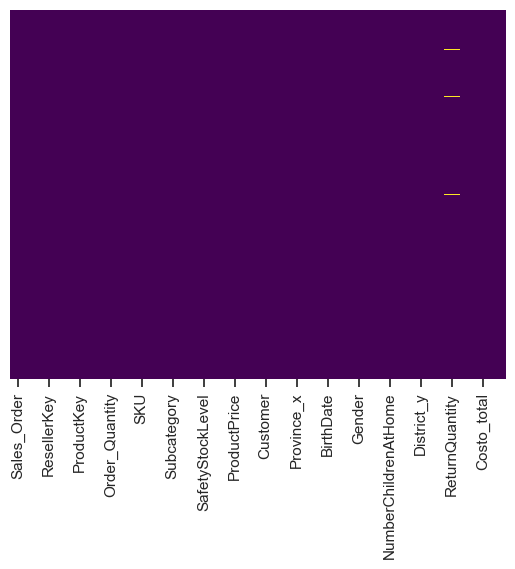

In [13]:
# Visualización de valores perdidos
# ==============================================================================
sns.heatmap(data_retail.isnull(),
            yticklabels = False,
            cbar = False,
            cmap='viridis')

<div class="alert alert-info"> 
<strong><div style="color: rgb(0, 0, 0);">✨  Nota:</div></strong> <br>
    <div style="color: rgb(0, 0, 0);">→ Como se aprecia en el grafico, existen algunos puntos de color <mark><b>amarillo</b></mark> que nos indica que existen elementos en blanco o NaNs, de la columna <strong> "ReturnQuantity"</strong> y del cual representan un 0.98%.</div>
</div>

In [15]:
# Identificamos la cantidad de NANs en cada función y seleccione solo aquellas que tienen NANs
# ==============================================================================
total_NA = data_retail.isnull().sum()[data_retail.isnull().sum() != 0]

# Calculamos el porcentaje de NANs en cada característica
percent_NA = data_retail.isnull().sum()[data_retail.isnull().sum() != 0]/data_retail.shape[0]

# Resumen de nuestros hallazgos en un Data Frame
missing = pd.concat([total_NA, percent_NA], axis=1, keys=['Total NANs', 'Porcentaje']).sort_values('Total NANs', ascending=False)
missing

,Total NANs,Porcentaje
ReturnQuantity,52223,0.009803


#### **Renombrando las columnas:**

In [17]:
# Renombrando las columnas:
# ==============================================================================
data_retail.rename({'Sales_Order':'Orden_Servicio','Channel':'Canal','ResellerKey':'Cod_Revendedor','CustomerKey':'Cod_Cliente','ProductKey':'Cod_Producto',
                    'OrderDate':'Fecha','Order_Quantity':'Cantidad','Cost_of_Freight':'Costo_Flete','Product':'Producto','Subcategory':'Subcategoria',
                    'Category':'Categoria','SafetyStockLevel':'Stock_Seguridad','ProductCost':'PC', 'ProductPrice':'PV','Customer':'Cliente',
                    'District_x':'Distrito_Cliente','Province_x':'Provincia_Cliente','Department':'Departamento','BirthDate':'Cumpleaños',
                    'MaritalStatus':'Estado_Civil','Gender':'Genero','YearlyIncome':'Ingreso_Anual','NumberChildrenAtHome':'Hijos','District_y':'Distrito_Revend',
                    'Province_y':'Provincia_Revend','ReturnQuantity':'Devoluciones'}, axis=1,inplace=True)
data_retail.head()

,Orden_Servicio,Canal,Cod_Revendedor,Cod_Cliente,Cod_Producto,Fecha,Cantidad,Costo_Flete,SKU,Producto,...,Genero,Ingreso_Anual,Hijos,Rubro,Distrito_Revend,Provincia_Revend,Devoluciones,Ingreso_total,Costo_total,Utilidad
0,SO43697,Internet,702,27207,310,2017-07-01,1,89.45675,BK-R93R-62,"Road-150 Red, 62",...,M,20000,0,Propio,San Borja,Lima,1.0,3578.27,2171.2942,1406.9758
1,SO43697,Internet,702,27207,310,2017-07-01,1,89.45675,BK-R93R-62,"Road-150 Red, 62",...,M,20000,0,Propio,San Borja,Lima,1.0,3578.27,2171.2942,1406.9758
2,SO43697,Internet,702,27207,310,2017-07-01,1,89.45675,BK-R93R-62,"Road-150 Red, 62",...,M,20000,0,Propio,San Borja,Lima,1.0,3578.27,2171.2942,1406.9758
3,SO43697,Internet,702,27207,310,2017-07-01,1,89.45675,BK-R93R-62,"Road-150 Red, 62",...,M,20000,0,Propio,San Borja,Lima,1.0,3578.27,2171.2942,1406.9758
4,SO43698,Internet,702,22548,346,2017-07-01,1,84.99975,BK-M82S-44,"Mountain-100 Silver, 44",...,M,70000,0,Propio,San Borja,Lima,1.0,3399.99,1912.1544,1487.8356


#### **Reemplazar los NaN con cero:**

In [19]:
# Reemplazar NaN por 0 en la columna 'Devoluciones'
# ==============================================================================
data_retail['Devoluciones'] = data_retail['Devoluciones'].fillna(0) # Para reemplazar los NaN con cero.

# Comprobando si hay valores nulos en alguna de las columnas
data_retail.isnull().values.any()

False

#### **Extrayendo el periodo de trabajo:**

Luego de esto, se puede validar que no existen más campos nulos o vacíos en ninguna de las columnas.

In [21]:
# Mostramos el número de filas y columnas
# ==============================================================================
print(f'El dataframe tiene {data_retail.shape[0]} filas y {data_retail.shape[1]} columnas.')

El dataframe tiene 5327418 filas y 32 columnas.


<a id='limpiar-dataset'></a>
## <font color="#ba4a00"><strong>Comprender y limpiar el Dataset </font>
<hr color="#F5F5F5" size="1">

In [23]:
# Mostramos el tipo de variable de cada columna
# ==============================================================================
data_retail.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5327418 entries, 0 to 5327417
Data columns (total 32 columns):
 #   Column             Dtype         
---  ------             -----         
 0   Orden_Servicio     object        
 1   Canal              object        
 2   Cod_Revendedor     int64         
 3   Cod_Cliente        int64         
 4   Cod_Producto       int64         
 5   Fecha              datetime64[ns]
 6   Cantidad           int64         
 7   Costo_Flete        float64       
 8   SKU                object        
 9   Producto           object        
 10  Subcategoria       object        
 11  Categoria          object        
 12  Stock_Seguridad    int64         
 13  PC                 float64       
 14  PV                 float64       
 15  DNI                int64         
 16  Cliente            object        
 17  Distrito_Cliente   object        
 18  Provincia_Cliente  object        
 19  Departamento       object        
 20  Cumpleaños         datet

#### **Escogiendo las columnas a trabajar:**

In [25]:
# Seleccionamos las columnas a trabajar, filtrando el numero que corresponden a las mismas
# ==============================================================================
df = data_retail.iloc[:, [0,3,4,5,6,9,15,16,17,19,29,31]]

df.head()

,Orden_Servicio,Cod_Cliente,Cod_Producto,Fecha,Cantidad,Producto,DNI,Cliente,Distrito_Cliente,Departamento,Ingreso_total,Utilidad
0,SO43697,27207,310,2017-07-01,1,"Road-150 Red, 62",10481355,Fernandez Zambrano Luis Angel,San Borja,Lima,3578.27,1406.9758
1,SO43697,27207,310,2017-07-01,1,"Road-150 Red, 62",10481355,Fernandez Zambrano Luis Angel,San Borja,Lima,3578.27,1406.9758
2,SO43697,27207,310,2017-07-01,1,"Road-150 Red, 62",10481355,Fernandez Zambrano Luis Angel,San Borja,Lima,3578.27,1406.9758
3,SO43697,27207,310,2017-07-01,1,"Road-150 Red, 62",10481355,Fernandez Zambrano Luis Angel,San Borja,Lima,3578.27,1406.9758
4,SO43698,22548,346,2017-07-01,1,"Mountain-100 Silver, 44",68398647,Gomez Loayza Alejandro Esteban,Santiago de Surco,Lima,3399.99,1487.8356


<a id='detectar-duplicados'></a>
## <font color="#ba4a00"><strong>Detección y eliminación de datos duplicados </font>
<hr color="#F5F5F5" size="1">

In [27]:
# Definir las columnas a considerar para la duplicación
# ==============================================================================
dup_cols = ['Orden_Servicio', 'Cod_Cliente', 'Cod_Producto', 'Fecha','Cantidad']

# Eliminar duplicados, manteniendo la primera aparición
ecommerce = df[~df.duplicated(subset=dup_cols, keep='first')]

# Mostrar las primeras filas del dataframe para verificar
ecommerce.head(10)

,Orden_Servicio,Cod_Cliente,Cod_Producto,Fecha,Cantidad,Producto,DNI,Cliente,Distrito_Cliente,Departamento,Ingreso_total,Utilidad
0,SO43697,27207,310,2017-07-01,1,"Road-150 Red, 62",10481355,Fernandez Zambrano Luis Angel,San Borja,Lima,3578.2700,1406.9758
4,SO43698,22548,346,2017-07-01,1,"Mountain-100 Silver, 44",68398647,Gomez Loayza Alejandro Esteban,Santiago de Surco,Lima,3399.9900,1487.8356
6,SO43699,21163,346,2017-07-01,1,"Mountain-100 Silver, 44",40912720,Agripina Yupanqui Monica,Santiago de Surco,Lima,3399.9900,1487.8356
8,SO43700,26187,336,2017-07-01,1,"Road-650 Black, 62",64444546,Najarro Garcia Jose Evsevio,Ventanilla,Callao,699.0982,285.9519
9,SO43701,23006,346,2017-07-01,1,"Mountain-100 Silver, 44",76019684,Tinco Diaz Abigail Cristina,Santiago de Surco,Lima,3399.9900,1487.8356
11,SO43702,28087,311,2017-07-01,1,"Road-150 Red, 44",76784364,Vela Burga Miguel Angel,Santiago de Surco,Lima,3578.2700,1406.9758
18,SO43703,19285,310,2017-07-01,1,"Road-150 Red, 62",40195574,Muoz Vallejo Maria Isabel,Catacaos,Piura,3578.2700,1406.9758
22,SO43704,17977,351,2017-07-01,1,"Mountain-100 Black, 48",65468014,Blumen Alegria Leyser,Trujillo,La Libertad,3374.9900,1476.8956
24,SO43705,13459,344,2017-07-01,1,"Mountain-100 Silver, 38",10530528,Caldero Arnao Patricia Ines,Santiago de Surco,Lima,3399.9900,1487.8356
25,SO43659,11000,349,2017-07-02,1,"Mountain-100 Black, 42",63289754,Aguilar Saavedra Fernando,Ventanilla,Callao,3374.9900,1476.8956


In [29]:
# Mostramos el número de filas y columnas del dataframe "ecommerce"
# ==============================================================================
print(f'El dataframe tiene {ecommerce.shape[0]} filas y {ecommerce.shape[1]} columnas.')

El dataframe tiene 177299 filas y 12 columnas.


Para evitar contar la misma venta dos o más veces, eliminaremos las ventas que estuvieran duplicadas, dejando solo 1 venta por cada una, para esto hemos filtrado las columnas que se repetia o coincidian en el **"Orden_Servicio", "Cod_Cliente", "Cod_Producto", "Fecha" y "Cantidad"**. Ahora tenemos 177,299 registros, es decir, han sido identificados y <mark><strong>eliminados 5,150,119 líneas duplicadas</strong></mark>.

<div class="alert alert-info"> 
<strong><div style="color: rgb(0, 0, 0);">✔️ Resultado:</div></strong> <br>
    <div style="color: rgb(0, 0, 0);">→ Como resultado de la limpieza realizada tenemos 177,299 registros luego de aplicar la limpieza de datos. </div>
</div>


Pero primero, para permitir la manipulación de datos, aplicaremos algunos tratamientos necesarios para el análisis.

<a id='tratamiento-datos'></a>
## <font color="#ba4a00"><strong>Tratamiento de Datos </font>
<hr color="#F5F5F5" size="1">

In [31]:
# Convertir las columnas 'Numérico' a formato objeto
# ==============================================================================
#ecommerce['Cod_Cliente'] = ecommerce['Cod_Cliente'].astype(str)
ecommerce['Cod_Cliente'] = ecommerce['Cod_Cliente'].astype(np.float64)
ecommerce['Cod_Producto'] = ecommerce['Cod_Producto'].astype(str)
#ecommerce['DNI'] = ecommerce['DNI'].astype(str)
ecommerce['DNI'] = ecommerce['DNI'].astype(np.float64)

# Convertir las columnas 'Numéricas' a dos decimales
# ==============================================================================
ecommerce['Ingreso_total'] = ecommerce['Ingreso_total'].round(2)
ecommerce['Utilidad'] = ecommerce['Utilidad'].round(2)

# Obteniendo año y mes de la fecha 
ecommerce['Year_mes'] = ecommerce['Fecha'].dt.to_period('M')

ecommerce.head(7)

,Orden_Servicio,Cod_Cliente,Cod_Producto,Fecha,Cantidad,Producto,DNI,Cliente,Distrito_Cliente,Departamento,Ingreso_total,Utilidad,Year_mes
0,SO43697,27207.0,310,2017-07-01,1,"Road-150 Red, 62",10481355.0,Fernandez Zambrano Luis Angel,San Borja,Lima,3578.27,1406.98,2017-07
4,SO43698,22548.0,346,2017-07-01,1,"Mountain-100 Silver, 44",68398647.0,Gomez Loayza Alejandro Esteban,Santiago de Surco,Lima,3399.99,1487.84,2017-07
6,SO43699,21163.0,346,2017-07-01,1,"Mountain-100 Silver, 44",40912720.0,Agripina Yupanqui Monica,Santiago de Surco,Lima,3399.99,1487.84,2017-07
8,SO43700,26187.0,336,2017-07-01,1,"Road-650 Black, 62",64444546.0,Najarro Garcia Jose Evsevio,Ventanilla,Callao,699.10,285.95,2017-07
9,SO43701,23006.0,346,2017-07-01,1,"Mountain-100 Silver, 44",76019684.0,Tinco Diaz Abigail Cristina,Santiago de Surco,Lima,3399.99,1487.84,2017-07
11,SO43702,28087.0,311,2017-07-01,1,"Road-150 Red, 44",76784364.0,Vela Burga Miguel Angel,Santiago de Surco,Lima,3578.27,1406.98,2017-07
18,SO43703,19285.0,310,2017-07-01,1,"Road-150 Red, 62",40195574.0,Muoz Vallejo Maria Isabel,Catacaos,Piura,3578.27,1406.98,2017-07


In [33]:
ecommerce.dtypes

Orden_Servicio              object
Cod_Cliente                float64
Cod_Producto                object
Fecha               datetime64[ns]
Cantidad                     int64
Producto                    object
DNI                        float64
Cliente                     object
Distrito_Cliente            object
Departamento                object
Ingreso_total              float64
Utilidad                   float64
Year_mes                 period[M]
dtype: object

<div class="alert alert-success"> 
    <strong><div style="color: rgb(0, 0, 0);"><strong>Resumiendo los pasos de limpieza y tratamiento realizados:</strong></div></strong> <br>
    <div style="color: rgb(0, 0, 0);">→ ✔️ Eliminación de 5,150,119 facturas duplicadas. </div>   
    <div style="color: rgb(0, 0, 0);">→ ✔️ Utilizaremos <strong><font color="#ff009e">177,299 facturas para nuestro análisis.</font></strong></div>
    <div style="color: rgb(0, 0, 0);">→ ✔️ Conversión de tipos de datos de algunas columnas. </div>
    <div style="color: rgb(0, 0, 0);">→ ✔️ Creación de una columna de Año y Mes para facilitar el análisis. </div>
    <div style="color: rgb(0, 0, 0);">→ ✔️ Conjunto de datos listo. ¡Empecemos! 💪 </div>
</div>

<a id='analisis-metricas'></a>
# <font color="#ba4a00"><strong>Análisis de Métricas de las Ventas </font>
<hr color="#F5F5F5" size="1">

<div class="alert alert-info"> 
<strong><div style="color: rgb(0, 0, 0);">💡 ¿Qué queremos responder?:</div></strong> <br>
    <div style="color: rgb(0, 0, 0);">→ ¿A cuánto asciende la venta promedio por mes?? </div>
    <div style="color: rgb(0, 0, 0);">→ ¿Cuantas ventas hay cada mes? </div>
    <div style="color: rgb(0, 0, 0);">→ ¿Cuál es el mes con más ventas? </div>
    <div style="color: rgb(0, 0, 0);">→ ¿Quiénes son los clientes más importantes? </div>
    <div style="color: rgb(0, 0, 0);">→ ¿Qué porcentaje de sus clientes volvieron a comprar? </div>
     <div style="color: rgb(0, 0, 0);">→ ¿Cuál es el monto promedio que gastan los clientes? </div>
     <div style="color: rgb(0, 0, 0);">→ ¿Cómo se desagrega la información según distrito donde se realizan las ventas? </div>
</div>

<a id='analisis-facturas'></a>
## <font color="#ba4a00"><strong>Análisis del número de facturas por Distrito </font>
<hr color="#F5F5F5" size="1">

Ahora analizaremos el número total de facturas emitidas por distrito y el porcentaje de facturas representadas por distrito y encontraremos **los 5 distritos que más compran productos en Lima y Provincias**.

In [35]:
# Definiendo los colores que se usarán en los gráficos
# ==============================================================================

verde = '#58d68d'
gris = '#34495e'

# De acuerdo a los colores del logo.

In [37]:
# Cantidad de OS por distrito
# ==============================================================================
df_factura_dist = pd.DataFrame(ecommerce.groupby(['Distrito_Cliente'])
                              ['Orden_Servicio'].count()).reset_index()
df_factura_dist.columns = ['Distrito_Cliente', 'Orden_Servicio']
df_factura_dist.sort_values('Orden_Servicio', ascending=False, inplace=True)
df_factura_dist.head(5) # Los 5 mejores distritos de Lima y provincia

,Distrito_Cliente,Orden_Servicio
44,Santiago de Surco,40707
39,San Borja,20371
47,Trujillo,18949
1,Arequipa,17119
6,Callao,15614


In [39]:
# Calcular el porcentaje de facturas por distrito.
# ==============================================================================
df_factura_dist['Porcentual_de_OS_%'] = (df_factura_dist['Orden_Servicio']/
                                             df_factura_dist['Orden_Servicio'].sum())*100
df_factura_dist['Porcentual_de_OS_%'] = df_factura_dist['Porcentual_de_OS_%'].round(2)
df_factura_dist.head(5)

,Distrito_Cliente,Orden_Servicio,Porcentual_de_OS_%
44,Santiago de Surco,40707,22.96
39,San Borja,20371,11.49
47,Trujillo,18949,10.69
1,Arequipa,17119,9.66
6,Callao,15614,8.81


El distrito de **Surco** es el que más compras realiza en Lima y **representa casi el 23% de las ventas totales**. Como la empresa se ubica en Lima, es muy probable que esto explique por qué ocupa el primer lugar.

Los siguientes 4 distritos con mayor cantidad de compras están en <strong>Lima y Provincias, es decir, ventas realizadas tanto en Lima como en provincias.</strong>. que son:
- San Borja, 
- Trujillo, 
- Arequipa y
- Callao, respectivamente.

<a id='analisis-total-dist'></a>
## <font color="#ba4a00"><strong>Análisis del valor total por distrito </font>
<hr color="#F5F5F5" size="1"> 


Ahora incluiremos el valor promedio, valor mínimo y valor máximo por distrito.

In [41]:
# Calculando el valor medio, máximo y mínimo de las OS por distrito
# ==============================================================================
df_valor_medio = pd.DataFrame(ecommerce.groupby(['Distrito_Cliente'])['Ingreso_total'].mean()).round(2).reset_index()
df_valor_max = pd.DataFrame(ecommerce.groupby(['Distrito_Cliente'])['Ingreso_total'].max()).reset_index()
df_valor_min = pd.DataFrame(ecommerce.groupby(['Distrito_Cliente'])['Ingreso_total'].min()).reset_index()

# Creando dataframe con la unión de los valores promedio, máximo y mínimo encontrados
# ==============================================================================
df_valor_dist = pd.merge(df_valor_medio,df_valor_min, on="Distrito_Cliente")
df_valor_dist = pd.merge(df_valor_dist,df_valor_max, on="Distrito_Cliente")

# Renaming columns before the merge to ensure correct column names
df_valor_dist.rename(columns={"Ingreso_total":"Valor_medio", 
                              "Ingreso_total_y":"Valor_minimo", 
                              "Ingreso_total_x":"Valor_maximo"}, inplace=True) 


# Creando un marco de datos para combinar los valores promedio, mínimo y máximo
# ==============================================================================
df_analisis_dist = pd.merge(df_factura_dist, df_valor_dist, on="Distrito_Cliente")

# Ordenando por valor promedio en orden descendente
# ==============================================================================
df_analisis_dist.sort_values('Valor_medio',ascending=False, inplace=True)

df_analisis_dist.head(5)

,Distrito_Cliente,Orden_Servicio,Porcentual_de_OS_%,Valor_maximo,Valor_minimo,Valor_medio
17,Pimentel,1822,1.03,1150.17,2.29,61985.82
1,San Borja,20371,11.49,1124.97,2.29,51029.70
11,Catacaos,3542,2.00,1118.62,2.29,50065.47
5,San Miguel,9655,5.45,1129.63,2.29,50065.47
15,La Perla,2385,1.35,1088.57,2.29,47599.86


Los <strong> Distritos con mayor valor medio por OS</strong> son:
- Pimentel 
- San Borja 
- Catacaos 
- San Miguel y 
- La Perla 

Podemos ver que excepto Pimentel (Arequipa) y Catacaos (Piura), todos los demás <strong> están en Lima y Callao, es decir, cerca de la tienda central </strong>. 

<div class="alert alert-info"> 
<strong><div style="color: rgb(0, 0, 0);">✨  Comentario:</div></strong> <br>
    <div style="color: rgb(0, 0, 0);"> → ¿Podría ser que el precio de compra promedio más alto para estos distritos se deba al costo del envío? 🤔</div>
</div>

In [43]:
# Ordenando por porcentaje en orden descendente
# ==============================================================================
df_analisis_dist.sort_values('Porcentual_de_OS_%',
                            ascending=False, inplace=True)
df_analisis_dist.head()

,Distrito_Cliente,Orden_Servicio,Porcentual_de_OS_%,Valor_maximo,Valor_minimo,Valor_medio
0,Santiago de Surco,40707,22.96,1098.97,2.29,43874.87
1,San Borja,20371,11.49,1124.97,2.29,51029.70
2,Trujillo,18949,10.69,1038.20,2.29,45297.33
3,Arequipa,17119,9.66,937.34,2.29,35761.05
4,Callao,15614,8.81,1110.89,2.29,40799.88


El distrito de Surco tiene un **valor medio de S/43,874.87** por factura u OS. Este valor se puede considerar bajo cuando analizamos los 5 valores medios más altos.

<div class="alert alert-warning"> 
<strong><div style="color: rgb(0, 0, 0);">💭  Importante:</div></strong> <br>
    <div style="color: rgb(0, 0, 0);"> → Un punto importante es que nos damos cuenta de que hay <strong> Facturas que muestren importes de S/2.29 (como valor minimo de compra)</strong>. 
        <div style="color: rgb(0, 0, 0);"> → Eso seria <strong>¿Error humano de tipeo?</strong>. 🤔
        <div style="color: rgb(0, 0, 0);"> → ¿O serían <strong> donaciones o regalos</strong> qué se llevaron a cabo? 🤔
</div>

<a id='facturas-por-mes'></a>
## <font color="#ba4a00"><strong>Facturas generadas por mes </font>
<hr color="#F5F5F5" size="1">  

Visualicemos la cantidad de facturas generadas por mes durante el período.

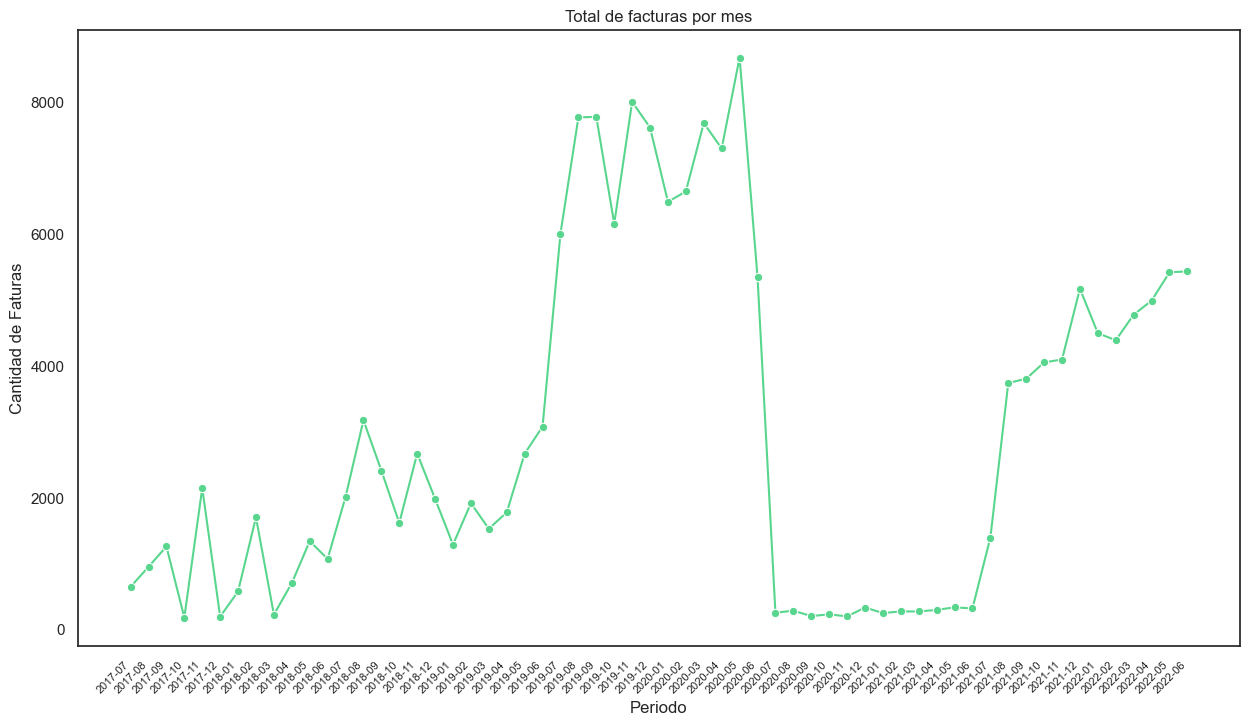

In [45]:
# Agrupando la cantidad de factura por Mes y Año.
# ==============================================================================
df_factura_mes = pd.DataFrame(ecommerce.groupby(['Year_mes'])
                             ['Orden_Servicio'].count()).reset_index()
df_factura_mes.rename(columns={"Orden_Servicio": "Cantidad_de_facturas"},
                             inplace=True)

# Convertir el tipo de datos de la columna "Año_mes" a cadena
# ==============================================================================
df_factura_mes['Year_mes'] = df_factura_mes['Year_mes'].astype(str)

# Gráfico
sns.set_theme(style="white", palette=None)
plt.figure(figsize = (15,8))

ax = sns.lineplot(data=df_factura_mes,
                  x="Year_mes",
                  y="Cantidad_de_facturas",
                  color=verde,
                  linewidth=1.5,
                  marker="o")
ax.set_xlabel('Periodo')
ax.set_ylabel('Cantidad de Faturas')
ax.set_title('Total de facturas por mes')

plt.xticks(rotation=45, ha='right', fontsize=8)
plt.show()

<a id='facturas-por-mes'></a>
## <font color="#ba4a00"><strong> Número de facturas de Lima versus facturas Provincias por mes </font>
<hr color="#F5F5F5" size="1">  


Después de segmentar a los clientes Oxford en dos grupos: aquellos que <strong>pertenecen a Lima</strong> y aquellos que <strong>no pertenece a Lima</strong>, Ahora comprobaremos el número de estos dos grupos.

Primero comprobaremos en qué distritos se encuentran los clientes.

In [47]:
ecommerce['Distrito_Cliente'].unique()

array(['San Borja', 'Santiago de Surco', 'Ventanilla', 'Catacaos',
       'Trujillo', 'Bellavista', 'Carmen de La Legua', 'Callao',
       'La Union', 'Castilla', 'Arequipa', 'San Miguel', 'Cura Mori',
       'Jose Leonardo Ortiz', 'La Perla', 'Chiclayo', 'Piura', 'Tuman',
       'Tambo Grande', 'Monsefu', 'La Victoria', 'Pucala', 'Pimentel',
       'Mariano Melgar', 'Ferreñafe', 'Motupe', 'Eten', 'Cayalti',
       'Illimo', 'Pomalca', 'Lambayeque', 'Breña', 'Los Olivos',
       'Chorrillos', 'San Isidro', 'Barranco', 'Pueblo Nuevo',
       'Jesus Maria', 'La Molina', 'Cañaris', 'Miraflores',
       'Villa El Salvador', 'Pueblo Libre', 'Surquillo', 'San Luis',
       'Lince', 'Santa Anita', 'Ate', 'Magdalena del Mar', 'Yanahuara',
       'Independencia', 'Ancon'], dtype=object)

In [49]:
# Crear una lista de distritos de Lima
# ==============================================================================
def clasificar_distrito(distrito):
  distritos_lima = ['Ancon', 'Ate', 'Barranco', 'Breña', 'Chorrillos', 
                  'Independencia', 'Jesus Maria', 'La Molina', 'La Victoria',
                  'Lince', 'Los Olivos', 'Magdalena del Mar', 'Miraflores',
                  'Pueblo Libre','San Borja', 'San Isidro', 'San Luis',
                  'San Miguel', 'Santa Anita',
                  'Santiago de Surco', 'Surquillo', 'Villa El Salvador']
  if distrito in distritos_lima:
    return 'Lima'
  else:
    return 'Provincia'

In [51]:
# Clasificando los clientes por distrito de Lima y Provincias de acuerdo a OS
# ==============================================================================
ecommerce['Tipo_Distrito'] = ecommerce['Distrito_Cliente'].apply(clasificar_distrito)

In [53]:
# Agrupar por tipo de distrito y calcular el promedio y la suma de 'Ingreso_total'
# ==============================================================================
resultados = ecommerce.groupby('Tipo_Distrito')['Ingreso_total'].agg(['mean', 'sum'])

# Renombrar las columnas para mayor claridad
resultados = resultados.rename(columns={'mean': 'Promedio', 'sum': 'Suma Total'})

# Mostrar los resultados
print(resultados)

                  Promedio    Suma Total
Tipo_Distrito                           
Lima           1111.610248  8.193123e+07
Provincia      1059.475668  1.097553e+08


Como se observa <strong> no hay una diferencia muy marcado entre Lima y Provincias de acuerdo a sus ingresos promedio</strong> por lo que se puede puede resumir que tanto en Lima y Provincia se han generado las mismas ventas.

Sin embargo, como la suma y el promedio de los valores de las facturas no tienen ningún impacto en los resultados finales en comparación con los valores totales de las facturas en el conjunto de datos, realizaremos el análisis contándolos, dejando como <strong> sumas generales para Lima y Provincias.</strong>

In [55]:
# Creando columna para clasificar si el cliente pertenece a Lima o Provincia
# ==============================================================================
ecommerce.loc[ecommerce['Tipo_Distrito']=="Lima"] 
ecommerce.loc[ecommerce['Tipo_Distrito']=="Provincia"]

# Agrupando el número de facturas por año y si pertenecen a Lima o Provincia
df_factura_mes_dist = pd.DataFrame(ecommerce.groupby(['Year_mes', 
                                              'Tipo_Distrito'])
                                  ['Orden_Servicio'].count()).reset_index()

# cambiar el nombre de la columna número_factura
df_factura_mes_dist.rename(columns={"Orden_Servicio":"Cantidad_de_facturas"},inplace=True)

# convertir el tipo de datos de la columna "Año_mes" a cadena
df_factura_mes_dist['Year_mes'] = df_factura_mes_dist['Year_mes'].astype(str)

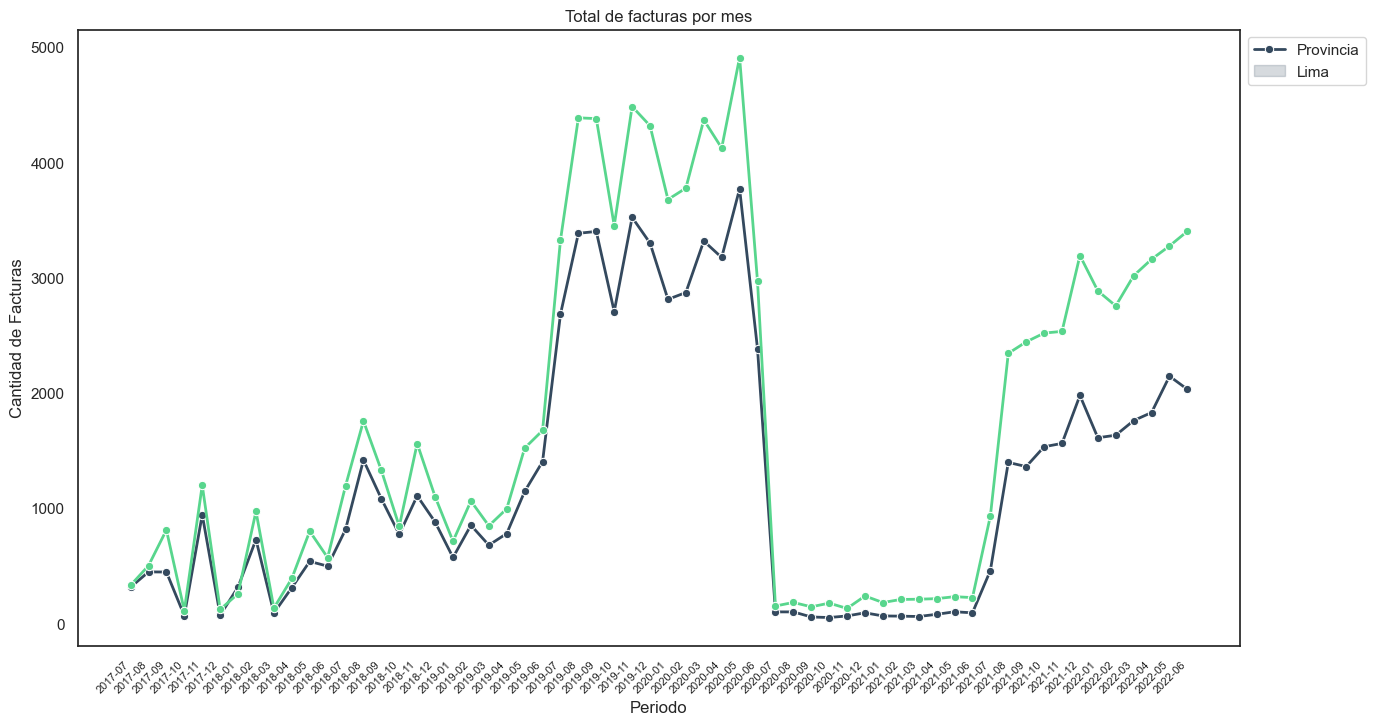

In [57]:
# Gráfico
# ==============================================================================
sns.set_theme(style="white", palette=None)
plt.figure(figsize = (15,8))
ax = sns.lineplot(data=df_factura_mes_dist,
                          x="Year_mes",
                          y="Cantidad_de_facturas",
                          hue="Tipo_Distrito",
                          legend=False,
                          palette=[gris,verde],
                          linewidth=2,
                          marker="o"
                 )
ax.set_xlabel('Periodo')
ax.set_ylabel('Cantidad de Facturas')
ax.set_title('Total de facturas por mes')

# Cambiar la posición y el nombre de los datos de la leyenda
plt.legend(labels = ['Provincia','Lima'],loc = 2, bbox_to_anchor = (1,1))
plt.xticks(rotation=45, ha='right', fontsize=8)
plt.show()

Se puede observar que, sin tener en cuenta el atípico mes de Julio de 2020, ambos segmentos crecen, pero los clientes pertenecientes a Lima crecen mas. 

<a id='clientes-por-mes'></a>
## <font color="#ba4a00"><strong>Número de nuevos clientes por mes </font>
<hr color="#F5F5F5" size="1">  

Ahora analizaremos el número de clientes únicos cada mes.

In [59]:
# Número de clientes únicos por mes y año
# ==============================================================================
df_clientes_nuevos = pd.DataFrame(ecommerce.groupby(['Year_mes'])
                                 ['Cod_Cliente'].nunique()).reset_index()
df_clientes_nuevos.columns = ['Year_mes', 'Cantidad_clientes_unicos']
df_clientes_nuevos

,Year_mes,Cantidad_clientes_unicos
0,2017-07,632
1,2017-08,933
2,2017-09,1237
3,2017-10,174
4,2017-11,2119
5,2017-12,185
6,2018-01,562
7,2018-02,1681
8,2018-03,219
9,2018-04,690


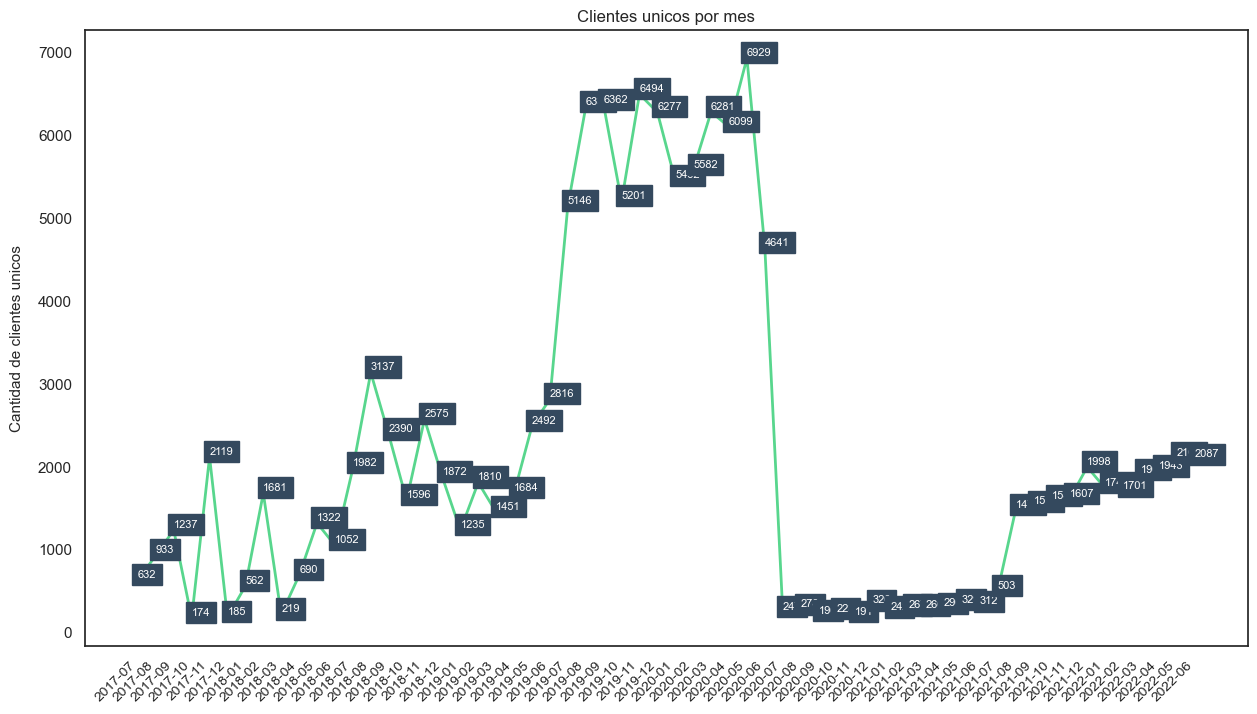

In [61]:
# Gráfico
# ==============================================================================

# Convertir el tipo de datos de la columna "Año_mes" a cadena
df_clientes_nuevos['Year_mes'] = df_clientes_nuevos['Year_mes'].astype(str)

sns.set_theme(style="white", palette=None)
plt.figure(figsize = (15,8))

ax = sns.lineplot(data=df_clientes_nuevos,
                  x="Year_mes",
                  y="Cantidad_clientes_unicos",
                  color=verde,
                  linewidth=2,
                  marker="o",
                  markersize=5)# Reducir el tamaño de los marcadores

ax.set_xlabel('', fontsize=11, labelpad=10)
ax.set_ylabel('Cantidad de clientes unicos', fontsize=11, labelpad=10)
ax.set_title('Clientes unicos por mes', fontsize=12)

# Incluyendo etiquetas en puntos del gráfico
for x, y in zip(df_clientes_nuevos['Year_mes'], 
                df_clientes_nuevos['Cantidad_clientes_unicos']):
     plt.text(x = x, # posicion x
               y = y+30, # posicion y + 30 en la coordenada
               s = '{:.0f}'.format(y), # formato 
               color = 'white', fontsize=8).set_backgroundcolor('#34495e') # fuente y color de fondo
plt.xticks(rotation=45, ha='right', fontsize=10)
plt.show()

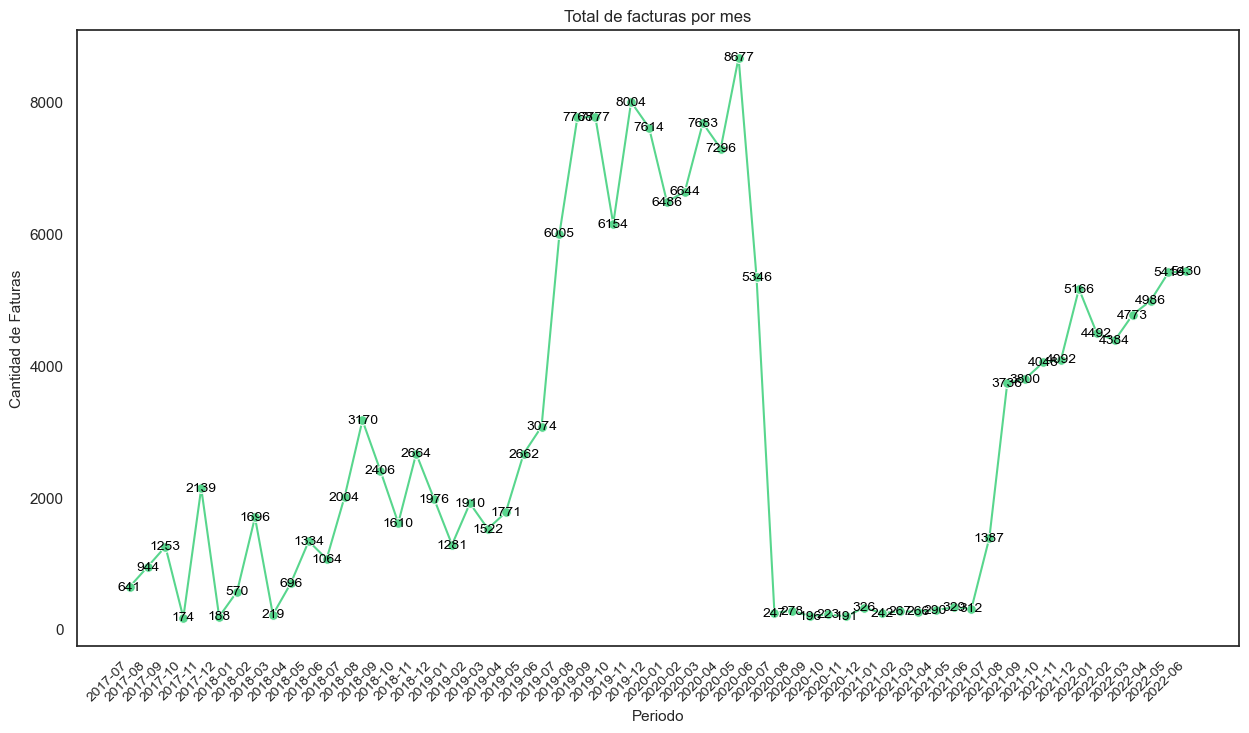

In [63]:
# Gráfico (Otra forma)
# ==============================================================================

# Convertir el tipo de datos de la columna "Año_mes" a cadena
df_clientes_nuevos['Year_mes'] = df_clientes_nuevos['Year_mes'].astype(str)

sns.set_theme(style="white", palette=None)
plt.figure(figsize = (15,8))

ax = sns.lineplot(data=df_factura_mes,
                  x="Year_mes",
                  y="Cantidad_de_facturas",
                  color=verde,
                  linewidth=1.5,
                  marker="o",
                  markersize=7)  
ax.set_xlabel('Periodo', fontsize=11) 
ax.set_ylabel('Cantidad de Faturas', fontsize=11)  
ax.set_title('Total de facturas por mes', fontsize=12)  

# Agregar texto a los marcadores
for x, y in zip(df_factura_mes["Year_mes"], df_factura_mes["Cantidad_de_facturas"]):
    ax.text(x, y, str(y), color="black", ha="center", va="center", fontsize=10)  

plt.xticks(rotation=45, ha='right', fontsize=10)  
plt.show()

<div class="alert alert-info"> 
<strong><div style="color: rgb(0, 0, 0);">✨  Comentario:</div></strong> <br>
    <div style="color: rgb(0, 0, 0);">  → En los meses de julio y noviembre-2019 y 2020 tuvieron el pico más alto de compras de clientes únicos. Probablemente esto se debió a eventos que estimulan las compras como <strong>Fiestas Patrias o Black Friday</strong>? 🤔 </div>
</div>

<a id='otros-analisis'></a>
## <font color="#ba4a00"><strong>Otros análisis relevantes para el dataset </font>
<hr color="#F5F5F5" size="1"> 

- Importe total de ventas por mes.

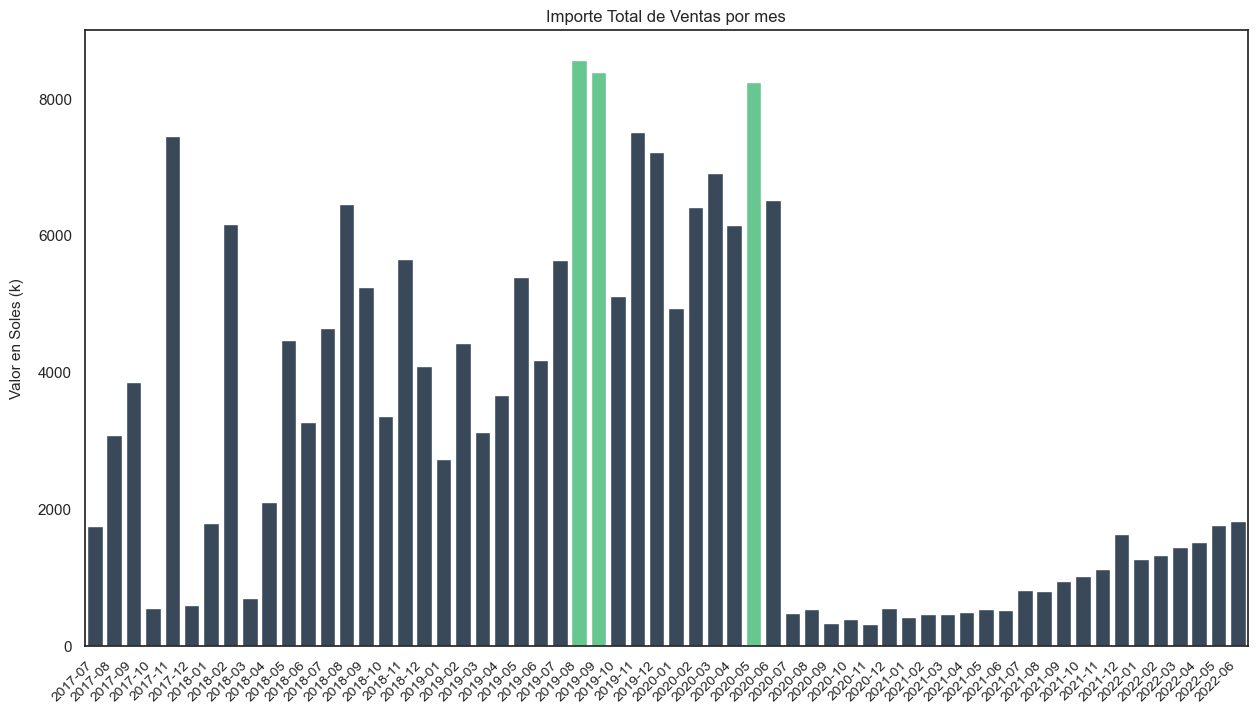

In [65]:
# Calculando las ventas totales por mes
# ==============================================================================

df_importe_mes = pd.DataFrame(ecommerce.groupby(['Year_mes'])
                               ['Ingreso_total'].sum()).reset_index()
df_importe_mes.columns = ['Year_mes', 'Importe Total de Ventas']

# Transformando el valor en un múltiplo de 1.000 o K.
df_importe_mes['Importe Total de Ventas (K)'] = (df_importe_mes['Importe Total de Ventas']
                                                   /1000).round(2)

# Convertir el tipo de datos de la columna "Año_mes" a cadena
df_importe_mes['Year_mes'] = df_importe_mes['Year_mes'].astype(str)

# Seleccionando el valor mínimo de los 3 mayores importes de ventas totales
minimo = min(df_importe_mes['Importe Total de Ventas (K)'].nlargest(n=3))

# Colorear los 3 más grandes de azul y colorear el resto de gris
clrs = [gris if (x < minimo) else verde 
        for x in df_importe_mes['Importe Total de Ventas (K)']]

# Creando el gráfico de barras
sns.set_theme(style="white", palette=None)
plt.figure(figsize = (15,8))
ax = sns.barplot(x="Year_mes",
                 y="Importe Total de Ventas (K)",
                 data=df_importe_mes,
                 ci=False,
                 palette=clrs)

ax.set_title('Importe Total de Ventas por mes')
ax.set_xlabel('', fontsize=12, labelpad=10)
ax.set_ylabel('Valor en Soles (k)', fontsize=11, labelpad=10)

plt.xticks(rotation=45, ha='right', fontsize=10)  
plt.show()

Podemos ver que los meses de _agosto_ y _setiembre de 2019_ y _mayo de 2020_ tuvieron el importe total más alto, con los montos S/8574.49K, S/8388.83K y S/8248.45K, respectivamente.

- Cantidad de ventas dentro y fuera de Lima, por mes.

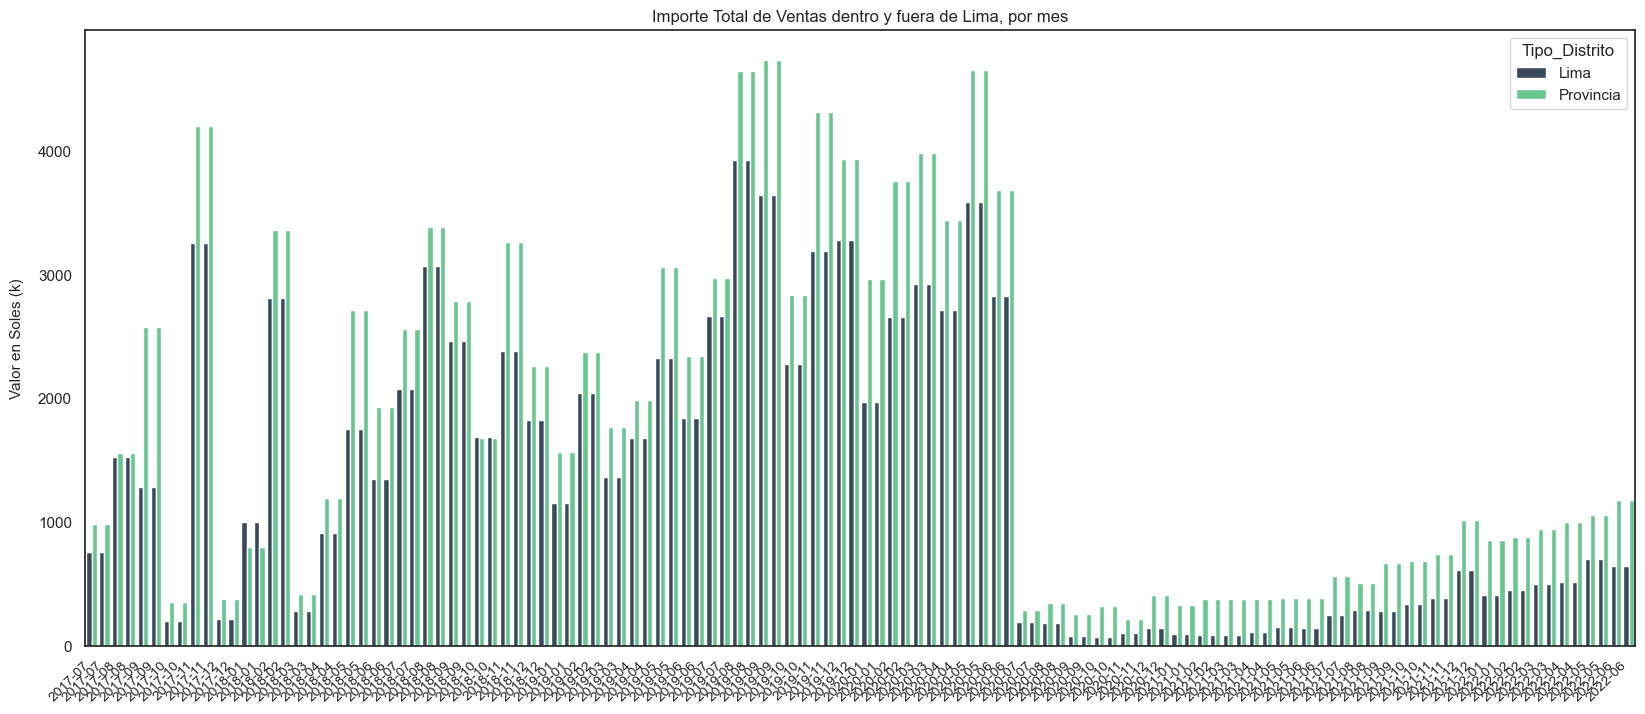

In [67]:
# Grafico
# ==============================================================================
df_mes= pd.DataFrame(ecommerce.groupby(by=['Year_mes',
                                    'Tipo_Distrito'])['Ingreso_total'].sum()).reset_index()
df_mes.columns = ['Year_mes','Tipo_Distrito', 'Importe Total de Ventas']

# Transformando el valor en un múltiplo de 1.000 o K.
df_mes['Importe Total de Ventas (K)'] = (df_mes['Importe Total de Ventas']/1000).round(2)

# Convertir el tipo de datos de la columna "Año_mes" a una cadena que se utilizará en el gráfico que se generará
df_mes['Year_mes'] = df_mes['Year_mes'].astype(str)


sns.set_theme(style="white", palette=[gris, verde])
plt.figure(figsize = (20,8))
ax = sns.barplot(x="Year_mes",
                 y="Importe Total de Ventas (K)",
                 data=df_mes,
                 order=df_mes['Year_mes'],
                 hue='Tipo_Distrito',
                 ci=False)

ax.set_title('Importe Total de Ventas dentro y fuera de Lima, por mes')
ax.set_xlabel('', fontsize=11, labelpad=10)
ax.set_ylabel('Valor en Soles (k)', fontsize=11, labelpad=10)

plt.xticks(rotation=45, ha='right', fontsize=10)  
plt.show()

Si observamos el gráfico de barras, es posible ver que hay una minima diferencia en las cantidades de ventas en Lima, que son mayores que las ventas fuera de Lima (Provincias).

- Los 10 mayores clientes que realizaron más compras dentro y fuera de Lima, en el mismo mes.

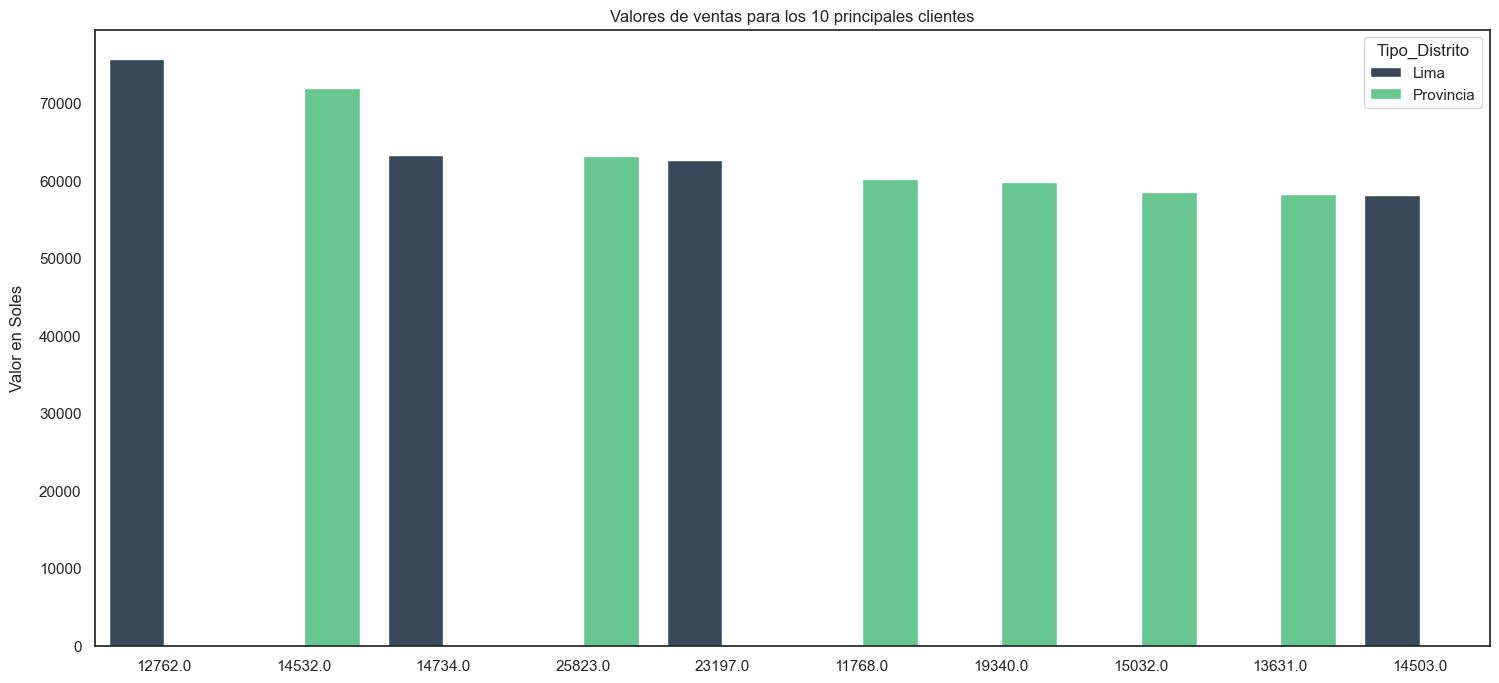

In [71]:
# Calculando los 10 clientes principales y determinar si son o no de Lima.
# ==============================================================================
df_cliente_mes= pd.DataFrame(ecommerce.groupby(by=['Cod_Cliente',
                                                      'Tipo_Distrito'])
                             ['Ingreso_total'].sum()).reset_index()
df_cliente_mes.columns = ['Cliente', 'Tipo_Distrito', 'Importe Total de Ventas']
df_cliente_mes.sort_values('Importe Total de Ventas', ascending=False, inplace=True)
df_cliente_mes = df_cliente_mes.head(10)

# visualizacion
sns.set_theme(style="white", palette=[gris, verde])
plt.figure(figsize = (18,8))
ax = sns.barplot(x="Cliente",
                 y="Importe Total de Ventas",
                 data=df_cliente_mes,
                 hue='Tipo_Distrito',
                 order=df_cliente_mes['Cliente'],
                 ci=False)
ax.set_title('Valores de ventas para los 10 principales clientes')
ax.set_xlabel('', fontsize=12, labelpad=10)
ax.set_ylabel('Valor en Soles', fontsize=12, labelpad=10)


# Agregar marcadores de texto a las barras
#for p in ax.patches:
    #ax.text(p.get_x() + p.get_width() / 2., p.get_height(),
            #'{:.0f}'.format(p.get_height()), ha='center', va='bottom')

plt.show()

- Cantidad mensual de productos vendidos.

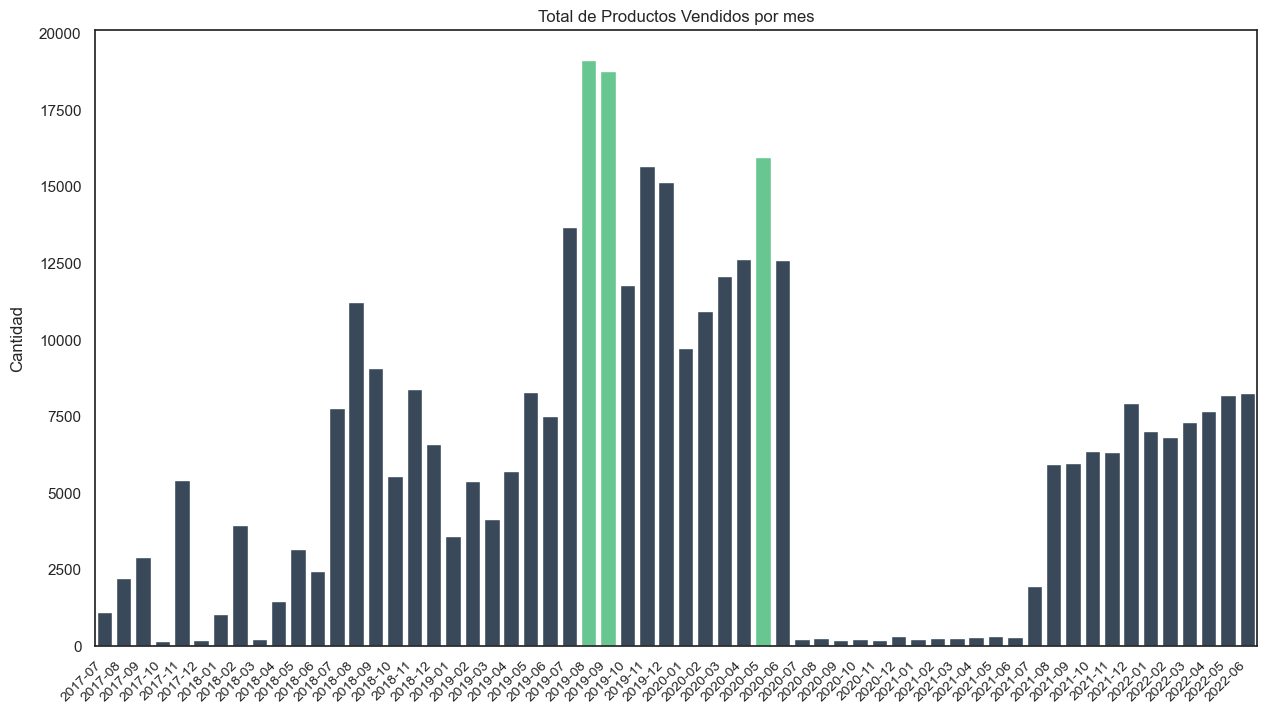

In [73]:
# Calcular la cantidad mensual de productos vendidos.
# ==============================================================================
df_productos = pd.DataFrame(ecommerce.groupby(['Year_mes'])
                           ['Cantidad'].sum()).reset_index()
df_productos.columns = ['Year_mes', 'Cantidad de Productos Vendidos']

# Convertir el tipo de datos de la columna "Año_mes" a cadena
df_productos['Year_mes'] = df_productos['Year_mes'].astype(str)

# Seleccionando el valor mínimo de los 3 mayores montos de ventas totales
minimo = min(df_productos['Cantidad de Productos Vendidos'].nlargest(n=3))

# colorear los 3 más grandes de azul y colorear el resto de gris
clrs = [gris if (x < minimo) else verde 
        for x in df_productos['Cantidad de Productos Vendidos']]

# Grafico de barras
sns.set_theme(style="white", palette=None)
plt.figure(figsize = (15,8))
ax = sns.barplot(x="Year_mes",
                 y="Cantidad de Productos Vendidos",
                 data=df_productos,
                 ci=False,
                 palette=clrs)

ax.set_title('Total de Productos Vendidos por mes')
ax.set_xlabel('', fontsize=12, labelpad=10)
ax.set_ylabel('Cantidad', fontsize=12, labelpad=10)

plt.xticks(rotation=45, ha='right', fontsize=10)  
plt.show()

- **OS Promedio del Período.**

In [75]:
# Ordenes de servicio promedio por periodo
# ==============================================================================
os = (ecommerce['Ingreso_total'].sum() / 
          ecommerce['Cod_Cliente'].count()).round(2)
os

1081.15

La OS promedio cuesta **S/1081.15**.

- **OS promedio mensual:**

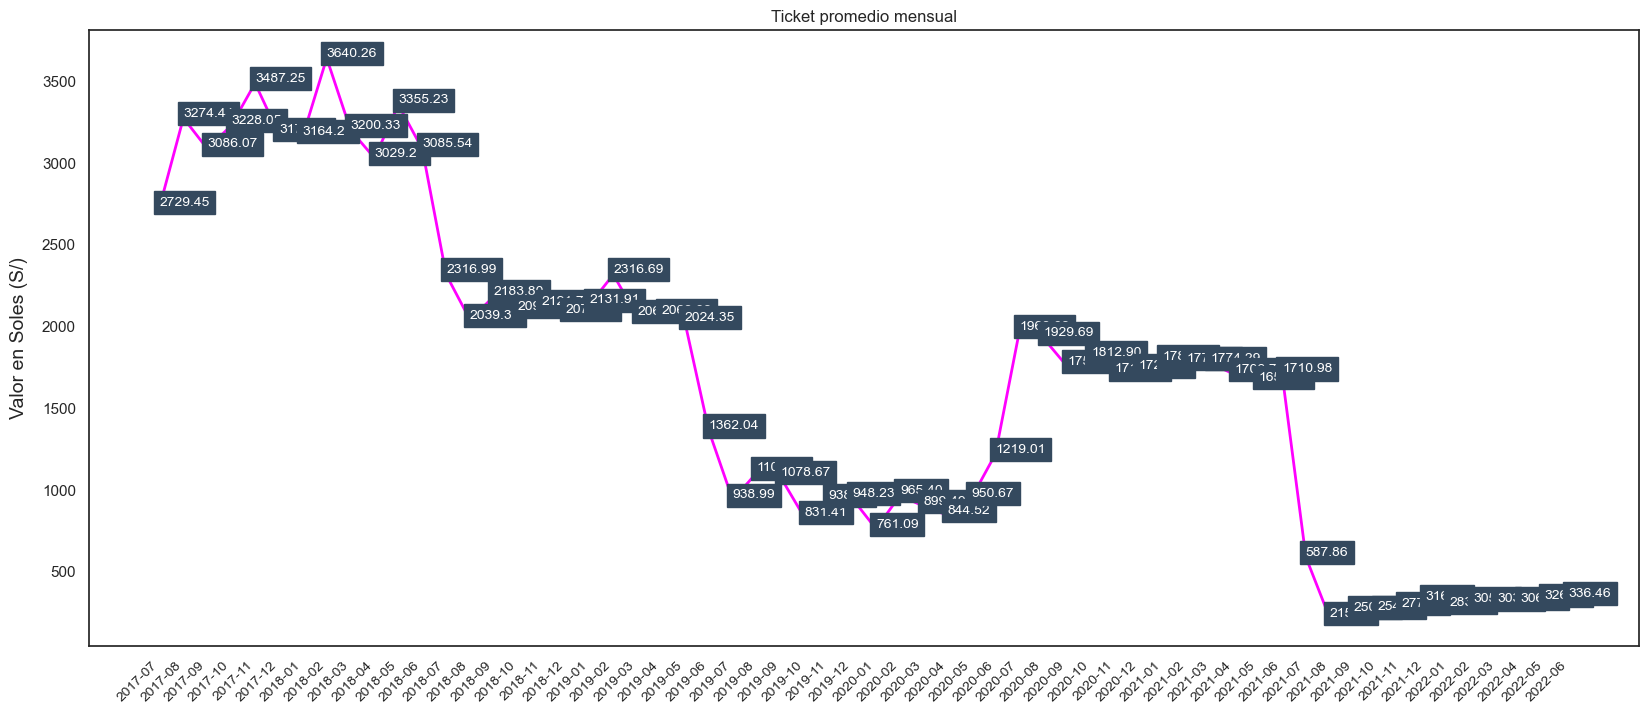

In [77]:
# Calcular el valor de ventas mensual
# ==============================================================================
ticket = pd.DataFrame(ecommerce.groupby(by=['Year_mes'])
                      ['Ingreso_total'].sum()).reset_index()

# Calcular el número de clientes mensuales.
ticket2 = pd.DataFrame(ecommerce.groupby(by=['Year_mes'])
                       ['Cod_Cliente'].count()).reset_index()

# Uniendo los dos marcos de datos creados
ticket_mensual =  pd.merge(ticket,
                          ticket2, on="Year_mes")

# Calcular el valor del ticket promedio mensual
for i in range(12):
    ticket_mensual['Ticket promedio mensual'] = (ticket['Ingreso_total'] 
                                            / ticket2['Cod_Cliente']).round(2)

# Convertir el tipo de datos de la columna "Año_mes" a cadena
ticket_mensual['Year_mes'] = ticket_mensual['Year_mes'].astype(str)

sns.set_theme(style="white", palette=None)
plt.figure(figsize = (20,8))

ax = sns.lineplot(data=ticket_mensual,
                  x="Year_mes",
                  y="Ticket promedio mensual",
                  color="magenta",
                  linewidth=2,
                  marker="o")

ax.set_xlabel('', fontsize=14, labelpad=10)
ax.set_ylabel('Valor en Soles (S/)', fontsize=14, labelpad=10)
ax.set_title('Ticket promedio mensual')

# incluyendo etiquetas en puntos del gráfico
for x, y in zip(ticket_mensual['Year_mes'],
                ticket_mensual['Ticket promedio mensual']):
     plt.text(x = x, # posicion x
               y = y+10, # posicion y + 30 en la coordenada
               s = '{:.2f}'.format(y), # formato 
               color = 'white', fontsize=10).set_backgroundcolor('#34495e') # fuente y color de fondo
plt.xticks(rotation=45, ha='right', fontsize=10)
plt.show()

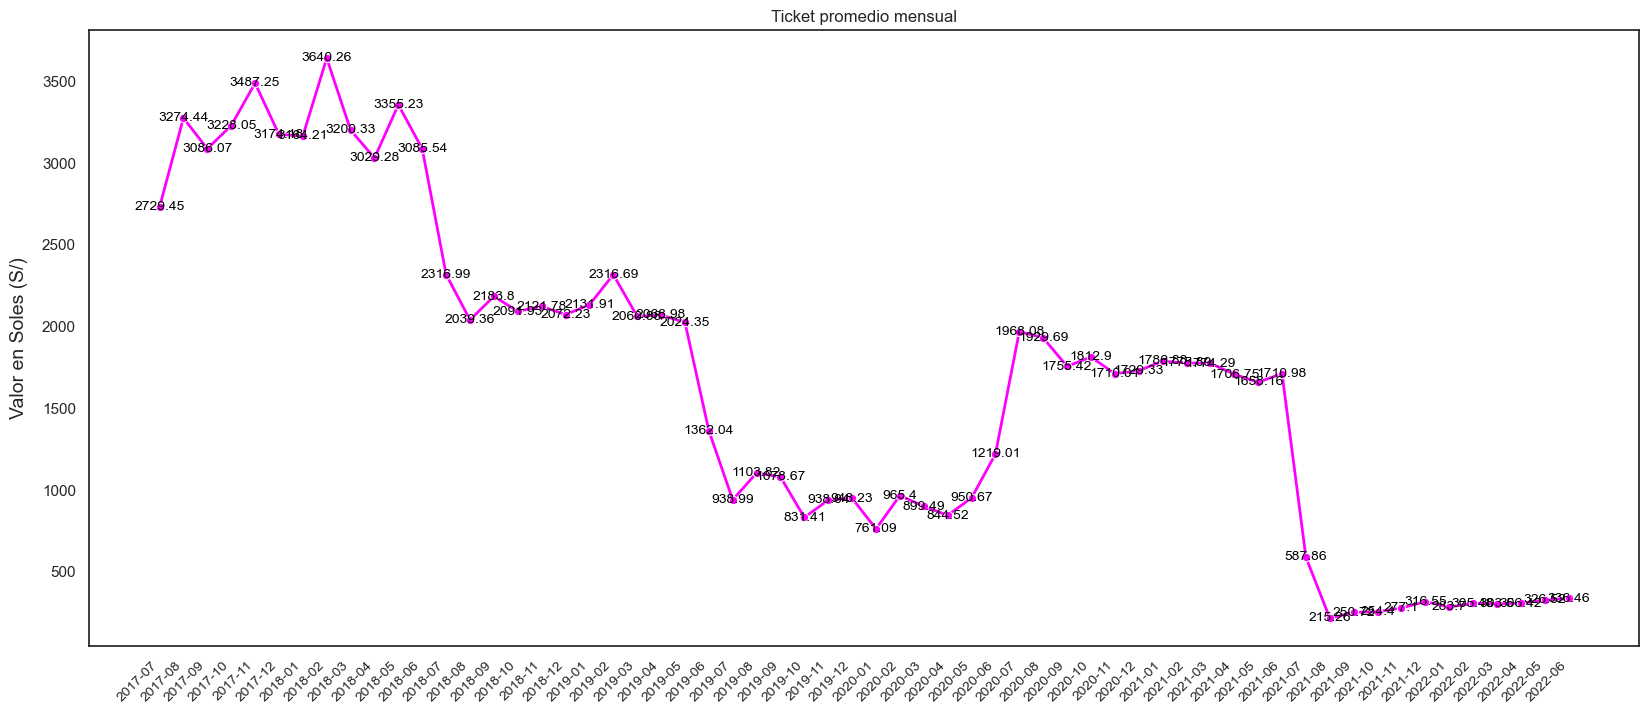

In [87]:
# Calcular el valor de ventas mensual
# ==============================================================================
ticket = pd.DataFrame(ecommerce.groupby(by=['Year_mes'])
                      ['Ingreso_total'].sum()).reset_index()

# Calcular el número de clientes mensuales.
ticket2 = pd.DataFrame(ecommerce.groupby(by=['Year_mes'])
                       ['Cod_Cliente'].count()).reset_index()

# Uniendo los dos marcos de datos creados
ticket_mensual =  pd.merge(ticket,
                          ticket2, on="Year_mes")

# Calcular el valor del ticket promedio mensual
for i in range(12):
    ticket_mensual['Ticket promedio mensual'] = (ticket['Ingreso_total'] 
                                            / ticket2['Cod_Cliente']).round(2)

# Convertir el tipo de datos de la columna "Año_mes" a cadena
ticket_mensual['Year_mes'] = ticket_mensual['Year_mes'].astype(str)

sns.set_theme(style="white", palette=None)
plt.figure(figsize = (20,8))

ax = sns.lineplot(data=ticket_mensual,
                  x="Year_mes",
                  y="Ticket promedio mensual",
                  color="magenta",
                  linewidth=2,
                  marker="o")

ax.set_xlabel('', fontsize=14, labelpad=10)
ax.set_ylabel('Valor en Soles (S/)', fontsize=14, labelpad=10)
ax.set_title('Ticket promedio mensual')

# incluyendo etiquetas en puntos del gráfico
for x, y in zip(ticket_mensual['Year_mes'],
                ticket_mensual['Ticket promedio mensual']):
     ax.text(x, y, str(y), color="black", ha="center", va="center", fontsize=10)  
    
plt.xticks(rotation=45, ha='right', fontsize=10)
plt.show()

<a id='analisis-cohorte'></a>
# <font color="#ba4a00"><strong>Análisis de Cohorte </font>
<hr color="#F5F5F5" size="1">

Ahora, crearemos una función que calcule la cohorte y devuelva el dataframe generado.

## ¿Qué es el análisis de cohortes?

En estadística, un cohorte es un **grupo de personas** que tienen en común un **evento que tuvo lugar en el mismo periodo**.

Analizar el comportamiento y desempeño de grupos de clientes que tienen atributos comunes ayuda en las estrategias que se deben adoptar. Por ejemplo, todos los clientes con la misma fecha de adquisición pertenecen al mismo cohorte.

Para este estudio organizaremos **clientes en grupos de fechas de adquisición** y analizaremos el comportamiento de estos grupos según métricas como **retención de clientes**, exclusivamente.

### **Periodo de Prueba:**

In [79]:
# Obteniendo las transacciones del Periodo 01-06-2021 al 01-06-2022
# ==============================================================================
oxford = ecommerce[(ecommerce['Fecha'] >='2021-06-01') & (ecommerce['Fecha'] <='2022-06-01')]
#oxford.head()

In [81]:
# Obteniendo los preiodos del Cohort
# ==============================================================================
oxford['orden_mes'] = oxford['Fecha'].dt.to_period('M')
oxford['cohort'] = oxford.groupby('Cod_Cliente')['Fecha'] \
                 .transform('min') \
                 .dt.to_period('M')

In [83]:
# Agrupando periodos
# ==============================================================================
df_cohort = oxford.groupby(['cohort', 'orden_mes']) \
              .agg(n_customers=('Cod_Cliente', 'nunique')) \
              .reset_index(drop=False)
df_cohort['numero_periodo'] = (df_cohort.orden_mes - df_cohort.cohort).apply(attrgetter('n'))

In [85]:
# Realizando un Pivot con las nuevas variables
# ==============================================================================
cohort_pivot = df_cohort.pivot_table(index = 'cohort',
                                     columns = 'numero_periodo',
                                     values = 'n_customers')

In [87]:
# Matriz de retención del Cohorte
# ==============================================================================
cohort_size = cohort_pivot.iloc[:,0]
retencion_matrix = cohort_pivot.divide(cohort_size, axis = 0)

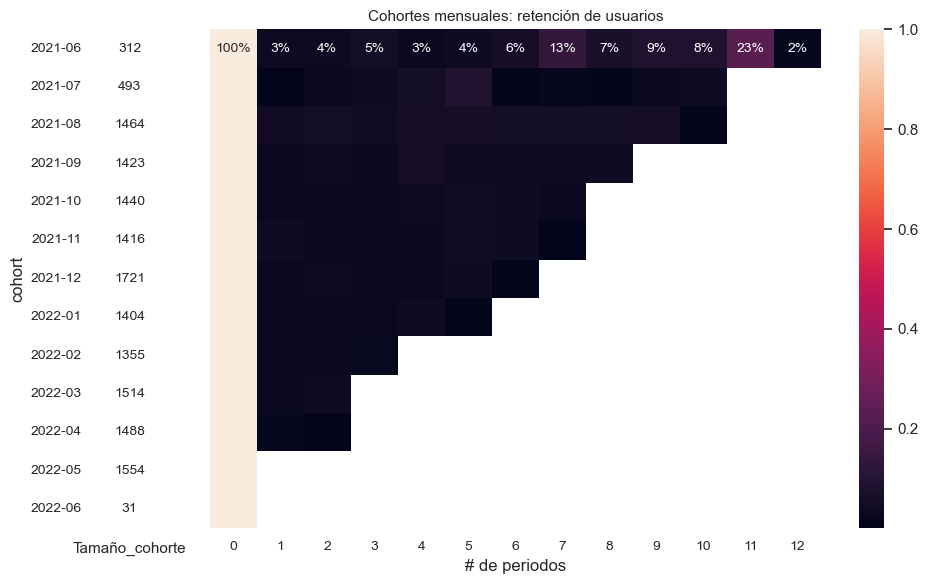

In [89]:
# Definiendo una función para asignar períodos existentes
# ==============================================================================
with sns.axes_style("white"):
    fig, ax = plt.subplots(1, 2, figsize=(10, 6), sharey=True, gridspec_kw={'width_ratios': [1, 11]})
    
    # Matriz de retención
    sns.heatmap(retencion_matrix, 
                mask=retencion_matrix.isnull(), 
                annot=True, 
                fmt='.0%', 
                cmap='rocket', 
                ax=ax[1],
                annot_kws={"size": 10}) # Reduce el tamaño de los porcentajes
    ax[1].set_title('Cohortes mensuales: Retención de usuarios Totales', fontsize=11)
    ax[1].set(xlabel='# de periodos',
              ylabel='')
    ax[1].tick_params(axis='x', labelsize=10) # Reduce el tamaño de las letras del eje x
    ax[1].tick_params(axis='y', labelsize=10) # Reduce el tamaño de las letras del eje y


    # Tamaño de cohorte
    cohort_size_df = pd.DataFrame(cohort_size).rename(columns={0: 'Tamaño_cohorte'})
    
    white_cmap = mcolors.ListedColormap(['white'])
    
    sns.heatmap(cohort_size_df, 
                annot=True, 
                cbar=False, 
                fmt='g', 
                cmap=white_cmap, 
                ax=ax[0],
                annot_kws={"size": 10}) # Reduce el tamaño de los números en el tamaño del cohort
    ax[0].tick_params(axis='y', labelsize=10) # Reduce el tamaño de las letras del eje y en el tamaño del cohort

    fig.tight_layout()

Imaginemos que este gráfico es como un tablero de juego donde cada fila representa un grupo de clientes que compraron por primera vez en el mismo mes (una "cohorte"). Las columnas muestran cuánto tiempo ha pasado desde su primera compra (en meses o "periodos").

**Los números dentro del tablero representan el porcentaje de clientes de cada cohorte que volvieron a comprar en un periodo determinado.**

Vamos a ver la primera fila (la primera cohorte):

- **Periodo 0 (100%):** Esto significa que en el mes inicial, todos los clientes de esa cohorte hicieron una compra (¡obvio, porque es su primera compra!).
- **Periodo 1 (3%):** De todos los clientes que compraron por primera vez en ese mes, solo el 3% volvió a comprar el siguiente mes.
- **Periodo 2 (4%):** El 4% de la cohorte inicial volvió a comprar dos meses después de su primera compra.
- **Y así sucesivamente**...

Ahora, vamos a ver qué pasa con las otras cohortes:

La idea es seguir el mismo patrón: mirar el porcentaje de clientes de cada cohorte que regresaron a comprar en cada periodo.
En la segunda cohorte (segunda fila), vemos que en el periodo 0 tienen un 100% (su primera compra). En el periodo 1, solo el 3% el  regresó, y en el periodo 2, el 4%, y así sucesivamente.
í sucesivamente.

**Interpretación general:**

- **Si los porcentajes se mantienen altos a lo largo de los periodos, significa que estás reteniendo bien a tus clientes**. Es decir, que vuelven a comprar después de su primera compra.
- **Si los porcentajes bajan rápidamente, significa que hay un problema de retención**. Los clientes no están volviendo a comprar, y debes investigar por qué.

**En resumen:** El gráfico de retención de cohortes te ayuda a entender cómo se comportan tus clientes a lo largo del tiempo y si estás logrando que vuelvan a comprar.

**Analogía:**

Imagina que tienes un equipo de fútbol. Cada fila del gráfico es como una temporada nueva, y cada columna es un partido. Los porcentajes te dicen cuántos de tus jugadores originales (de la primera temporada) siguen jugando en cada partido.

In [91]:
# Agrupando y contando clientes únicos
# ==============================================================================
cohortes_df = pd.DataFrame(oxford.groupby(['Year_mes'])['Cod_Cliente'].nunique()).reset_index()
cohortes_df.columns = ['Year_mes', 'Total_clientes']

# Calculando nuevos clientes (igual que antes)
# ==============================================================================
cohortes_df['Nuevos_clientes'] = cohortes_df['Total_clientes'] - cohortes_df['Total_clientes'].shift(1, fill_value=0)

# Calculate retention rates
# ==============================================================================
cohortes_retencion_df = cohort_pivot.divide(cohort_pivot.iloc[:, 0], axis=0)
cohortes_retencion_df = cohortes_retencion_df.reset_index() # Restablecer el índice para convertir la 'cohorte' en una columna normal

cohortes_df

,Year_mes,Total_clientes,Nuevos_clientes
0,2021-06,312,312
1,2021-07,503,191
2,2021-08,1479,976
3,2021-09,1519,40
4,2021-10,1588,69
5,2021-11,1607,19
6,2021-12,1998,391
7,2022-01,1740,-258
8,2022-02,1701,-39
9,2022-03,1904,203


#### **GUARDAR EL RESULTADO DEL ANALISIS COHORT EN ARCHIVO XLSX:**

In [93]:
# Guardando los resultados del 'retencion_matrix' y/o 'oxford'
# ==============================================================================
analisis_cohort = pd.DataFrame(retencion_matrix)
analisis_cohort.to_excel('Analisis_cohort.xlsx', index=False)

### **Periodo de prueba - Clientes Lima:**

In [95]:
# Obteniendo las transacciones del Periodo 01-06-2021 al 01-06-2022
# ==============================================================================
oxford_li = ecommerce.loc[ecommerce['Tipo_Distrito']=="Lima"] 
oxford_lima = oxford_li[(oxford_li['Fecha'] >='2021-06-01') & (oxford_li['Fecha'] <='2022-06-01')]

In [97]:
# Obteniendo los preiodos del Cohort de la provincia de Lima
# ==============================================================================
oxford_lima['orden_mes'] = oxford_lima['Fecha'].dt.to_period('M')
oxford_lima['cohort'] = oxford_lima.groupby('Cod_Cliente')['Fecha'] \
                 .transform('min') \
                 .dt.to_period('M') 

# Agrupando periodos
# ==============================================================================
df_cohort = oxford_lima.groupby(['cohort', 'orden_mes']) \
              .agg(n_customers=('Cod_Cliente', 'nunique')) \
              .reset_index(drop=False)
df_cohort['numero_periodo'] = (df_cohort.orden_mes - df_cohort.cohort).apply(attrgetter('n'))

# Realizando un Pivot con las nuevas variables
# ==============================================================================
cohort_pivot = df_cohort.pivot_table(index = 'cohort',
                                     columns = 'numero_periodo',
                                     values = 'n_customers')

# Matriz de retención del Cohorte
# ==============================================================================
cohort_size = cohort_pivot.iloc[:,0]
retencion_matrix_lima = cohort_pivot.divide(cohort_size, axis = 0)

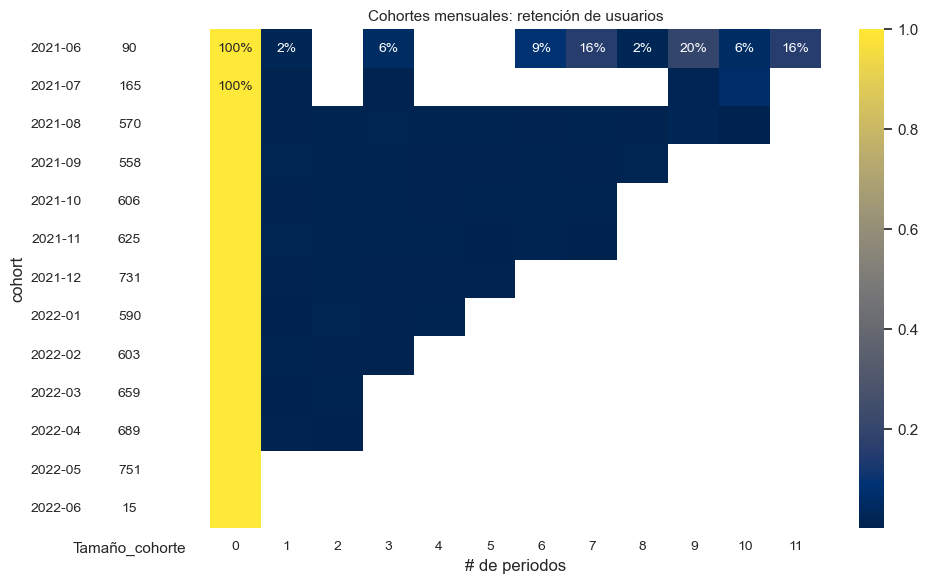

In [99]:
# Definiendo una función para asignar períodos existentes
# ==============================================================================
with sns.axes_style("white"):
    fig, ax = plt.subplots(1, 2, figsize=(10, 6), sharey=True, gridspec_kw={'width_ratios': [1, 11]})
    
    # Matriz de retención
    sns.heatmap(retencion_matrix_lima, 
                mask=retencion_matrix_lima.isnull(), 
                annot=True, 
                fmt='.0%', 
                cmap='cividis', 
                ax=ax[1],
                annot_kws={"size": 10}) # Reduce el tamaño de los porcentajes
    ax[1].set_title('Cohortes mensuales: Retención de usuarios en Lima', fontsize=11)
    ax[1].set(xlabel='# de periodos',
              ylabel='')
    ax[1].tick_params(axis='x', labelsize=10) # Reduce el tamaño de las letras del eje x
    ax[1].tick_params(axis='y', labelsize=10) # Reduce el tamaño de las letras del eje y


    # Tamaño de cohorte
    cohort_size_df = pd.DataFrame(cohort_size).rename(columns={0: 'Tamaño_cohorte'})
    
    white_cmap = mcolors.ListedColormap(['white'])
    
    sns.heatmap(cohort_size_df, 
                annot=True, 
                cbar=False, 
                fmt='g', 
                cmap=white_cmap, 
                ax=ax[0],
                annot_kws={"size": 10}) # Reduce el tamaño de los números en el tamaño del cohort
    ax[0].tick_params(axis='y', labelsize=10) # Reduce el tamaño de las letras del eje y en el tamaño del cohort

    fig.tight_layout()

In [101]:
# Agrupando y contando clientes únicos de Lima
# ==============================================================================
cohortes_li_df = pd.DataFrame(oxford_lima.groupby(['Year_mes'])['Cod_Cliente'].nunique()).reset_index()
cohortes_li_df.columns = ['Year_mes', 'Total_clientes']

# Calculando nuevos clientes (igual que antes)
# ==============================================================================
cohortes_li_df['Nuevos_clientes'] = cohortes_li_df['Total_clientes'] - cohortes_li_df['Total_clientes'].shift(1, fill_value=0)

# Calculate retention rates
# ==============================================================================
cohortes_retencion_df_li = cohort_pivot.divide(cohort_pivot.iloc[:, 0], axis=0)
cohortes_retencion_df_li = cohortes_retencion_df_li.reset_index() # Restablecer el índice para convertir la 'cohorte' en una columna normal

cohortes_li_df

,Year_mes,Total_clientes,Nuevos_clientes
0,2021-06,90,90
1,2021-07,167,77
2,2021-08,571,404
3,2021-09,568,-3
4,2021-10,621,53
5,2021-11,645,24
6,2021-12,766,121
7,2022-01,633,-133
8,2022-02,634,1
9,2022-03,725,91


### **Periodo de prueba - Clientes Provincia:**

In [176]:
# Obteniendo las transacciones del Periodo 01-06-2021 al 01-06-2022
# ==============================================================================
oxford_pro = ecommerce.loc[ecommerce['Tipo_Distrito']=="Provincia"]
oxford_provincia = oxford_pro[(oxford_pro['Fecha'] >='2021-06-01') & (oxford_pro['Fecha'] <='2022-06-01')]

In [178]:
# Obteniendo los preiodos del Cohort en Provincias
# ==============================================================================
oxford_provincia['orden_mes'] = oxford_provincia['Fecha'].dt.to_period('M')
oxford_provincia['cohort'] = oxford_provincia.groupby('Cod_Cliente')['Fecha'] \
                 .transform('min') \
                 .dt.to_period('M')

# Agrupando periodos
# ==============================================================================
df_cohort2 = oxford_provincia.groupby(['cohort', 'orden_mes']) \
              .agg(n_customers=('Cod_Cliente', 'nunique')) \
              .reset_index(drop=False)
df_cohort2['numero_periodo'] = (df_cohort2.orden_mes - df_cohort2.cohort).apply(attrgetter('n'))

# Realizando un Pivot con las nuevas variables
# ==============================================================================
cohort_pivot = df_cohort2.pivot_table(index = 'cohort',
                                     columns = 'numero_periodo',
                                     values = 'n_customers')

# Matriz de retención del Cohorte
# ==============================================================================
cohort_size2 = cohort_pivot.iloc[:,0]
retencion_matrix_provincia = cohort_pivot.divide(cohort_size2, axis = 0)

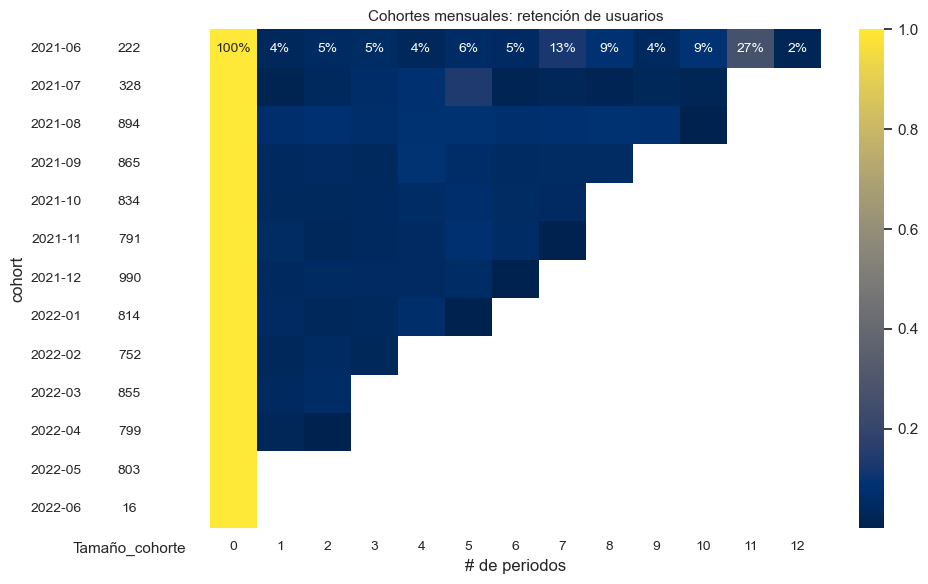

In [180]:
# Definiendo una función para asignar períodos existentes
# ==============================================================================
with sns.axes_style("white"):
    fig, ax = plt.subplots(1, 2, figsize=(10, 6), sharey=True, gridspec_kw={'width_ratios': [1, 11]})

    # Matriz de retención
    sns.heatmap(retencion_matrix_provincia,
                mask=retencion_matrix_provincia.isnull(),
                annot=True,
                fmt='.0%',
                cmap='cividis',
                ax=ax[1],
                annot_kws={"size": 10}) # Reduce el tamaño de los porcentajes
    ax[1].set_title('Cohortes mensuales: Retención de usuarios en Provincia', fontsize=11)
    ax[1].set(xlabel='# de periodos',
              ylabel='')
    ax[1].tick_params(axis='x', labelsize=10) # Reduce el tamaño de las letras del eje x
    ax[1].tick_params(axis='y', labelsize=10) # Reduce el tamaño de las letras del eje y


    # Tamaño de cohorte
    cohort_size_df2 = pd.DataFrame(cohort_size2).rename(columns={0: 'Tamaño_cohorte'})

    white_cmap = mcolors.ListedColormap(['white'])

    sns.heatmap(cohort_size_df2,
                annot=True,
                cbar=False,
                fmt='g',
                cmap=white_cmap,
                ax=ax[0],
                annot_kws={"size": 10}) # Reduce el tamaño de los números en el tamaño del cohort
    ax[0].tick_params(axis='y', labelsize=10) # Reduce el tamaño de las letras del eje y en el tamaño del cohort

    fig.tight_layout()

In [182]:
# Agrupando y contando clientes únicos en Provincia
# ==============================================================================
cohortes_pro_df = pd.DataFrame(oxford_provincia.groupby(['Year_mes'])['Cod_Cliente'].nunique()).reset_index()
cohortes_pro_df.columns = ['Year_mes', 'Total_clientes']

# Calculando nuevos clientes (igual que antes)
# ==============================================================================
cohortes_pro_df['Nuevos_clientes'] = cohortes_pro_df['Total_clientes'] - cohortes_pro_df['Total_clientes'].shift(1, fill_value=0)

# Calculate retention rates
# ==============================================================================
cohortes_retencion_df_pro = cohort_pivot.divide(cohort_pivot.iloc[:, 0], axis=0)
cohortes_retencion_df_pro = cohortes_retencion_df_pro.reset_index() # Restablecer el índice para convertir la 'cohorte' en una columna normal

cohortes_pro_df

,Year_mes,Total_clientes,Nuevos_clientes
0,2021-06,222,222
1,2021-07,336,114
2,2021-08,908,572
3,2021-09,951,43
4,2021-10,967,16
5,2021-11,962,-5
6,2021-12,1232,270
7,2022-01,1107,-125
8,2022-02,1067,-40
9,2022-03,1179,112


Aparentemente las gestiones de ventas se han realizado de mejor manera en las Provincias que en Lima, esto amerita un análisis más detallado con el método de segmentación de clientes por el RFM.

<a id='segmentacion'></a>
# <font color="#ba4a00"><strong> Segmentación de clientes mediante RFM </font>
<hr color="#F5F5F5" size="1">

El análisis RFM (Recencia, Frecuencia y Valor Monetario) se basa en el **Principio de Pareto** y se usa en el dicho de que el 80% de los resultados provienen del 20% de las causas. Asimismo, el 20% de los clientes aportan el 80% de sus ingresos totales.

El RFM se puede representar así:

- **Recencia:** ¿Qué clientes han realizado compras más recientemente?
- **Frecuencia:** ¿Qué clientes compran más? y
- **Valor monetario:** ¿Qué clientes realizaron las mayores compras sumadas al total?

Luego de categorizar y clasificar a cada cliente según los resultados encontrados, es posible **determinar qué tipo de segmento es cada cliente** será definido, y después de eso, **qué estrategia se aplicará a cada cliente**. 

A partir de este punto prepararemos y calcularemos el RFM de los clientes.


<a id='preparando-segmentacion'></a>
## <font color="#ba4a00"><strong> Preparando un nuevo dataset para generar segmentación de clientes. </font>
<hr color="#F5F5F5" size="1">


<div class="alert alert-info"> 
<strong><div style="color: rgb(0, 0, 0);">✨  Consideraciones:</div></strong> <br>
    <div style="color: rgb(0, 0, 0);"> → <strong>Recencia:</strong>  Calculamos cuántos días han pasado desde la última compra del cliente.</div>
    <div style="color: rgb(0, 0, 0);"> → <strong>Frecuencia:</strong> calculamos cuántas compras ya ha realizado el cliente, y</div>
    <div style="color: rgb(0, 0, 0);"> → <strong>Monetario:</strong> Calculamos la suma de todas las compras realizadas por el cliente.</div>
</div>

In [103]:
# Calculando la Recencia
# ==============================================================================
# Se puede realizar con el nuevo dataset de "oxford"

df_recencia = ecommerce.groupby(by='Cod_Cliente',
                                   as_index=False)['Fecha'].max()
df_recencia.columns = ['Clientes', 'Ultima_compra']

data_recencia = df_recencia['Ultima_compra'].max()
df_recencia['Recencia'] = df_recencia['Ultima_compra'].apply(lambda x:
                                                                  (data_recencia - x).days)

# calculando a Frecuencia
# ==============================================================================
df_frecuencia = ecommerce.drop_duplicates().groupby(
                    by=['Cod_Cliente'],as_index=False)['Fecha'].count()
df_frecuencia.columns = ['Clientes', 'Frecuencia']

# calculando el Valor monetario
# ==============================================================================
df_monetario = ecommerce.groupby(by='Cod_Cliente',
                                    as_index=False)['Ingreso_total'].sum()
df_monetario.columns = ['Clientes', 'Monetario']

# Creando un dataframe con los datos calculados ya unidos
# ==============================================================================
df_rfm = df_recencia.merge(df_frecuencia, on='Clientes')
df_rfm = df_rfm.merge(df_monetario, on='Clientes')

ecommerce_segmentacion = ecommerce.copy()
ecommerce_segmentacion.drop(columns=['Orden_Servicio',
                                       'Fecha',
                                       'Cantidad',
                                       'DNI',
                                       'Departamento',
                                       'Cod_Producto',
                                       'Ingreso_total',
                                       'Utilidad',
                                       'Year_mes'],
                                inplace=True)

# Eliminando duplicados
# ==============================================================================
ecommerce_segmentacion.drop_duplicates(inplace=True)
ecommerce_segmentacion.rename(columns={'Cod_Cliente':'Clientes'}, inplace=True)

# Uniendo el DataFrames por código de cliente
df_rfm = ecommerce_segmentacion.merge(df_rfm, on='Clientes')
df_rfm.head()

,Clientes,Producto,Cliente,Distrito_Cliente,Tipo_Distrito,Ultima_compra,Recencia,Frecuencia,Monetario
0,27207.0,"Road-150 Red, 62",Fernandez Zambrano Luis Angel,San Borja,Lima,2021-09-07,296,9,8541.6
1,27207.0,"Sport-100 Helmet, Blue",Fernandez Zambrano Luis Angel,San Borja,Lima,2021-09-07,296,9,8541.6
2,27207.0,"LL Road Frame - Black, 58",Fernandez Zambrano Luis Angel,San Borja,Lima,2021-09-07,296,9,8541.6
3,27207.0,"Classic Vest, M",Fernandez Zambrano Luis Angel,San Borja,Lima,2021-09-07,296,9,8541.6
4,27207.0,"Touring-2000 Blue, 46",Fernandez Zambrano Luis Angel,San Borja,Lima,2021-09-07,296,9,8541.6


<a id='crear-cuartiles'></a>
## <font color="#ba4a00"><strong> Creando el cuartil para realizar la clasificación de clientes. </font>
<hr color="#F5F5F5" size="1">

Para generar los cuartiles necesarios analizaremos la distribución de los datos de Recencia, Frecuencia y Valor monetario.

In [105]:
# Generando la media, la mediano y la moda de Recencia
# ==============================================================================
print('Recencia')
print('Media: ' ,df_rfm['Recencia'].mean())
print('Mediana: ' ,df_rfm['Recencia'].median())
print('Moda: ', df_rfm['Recencia'].mode())

# Gerando la media, la mediano y la moda de Frecuencia
# ==============================================================================
print('Frecuencia')
print('Media: ' ,df_rfm['Frecuencia'].mean())
print('Mediana: ' ,df_rfm['Frecuencia'].median())
print('Moda: ', df_rfm['Frecuencia'].mode())

# Gerando la media, la mediano y la moda del Valor monetario
# ==============================================================================
print('Monetario')
print('Media: ' ,df_rfm['Monetario'].mean())
print('Mediana: ' ,df_rfm['Monetario'].median())
print('Moda: ', df_rfm['Monetario'].mode())

Recencia
Media:  179.93633553396197
Mediana:  145.0
Moda:  0    121
Name: Recencia, dtype: int64
Frecuencia
Media:  10.621254238506609
Mediana:  10.0
Moda:  0    10
Name: Frecuencia, dtype: int64
Monetario
Media:  11263.22342776866
Mediana:  9429.86
Moda:  0    16386.87
Name: Monetario, dtype: float64


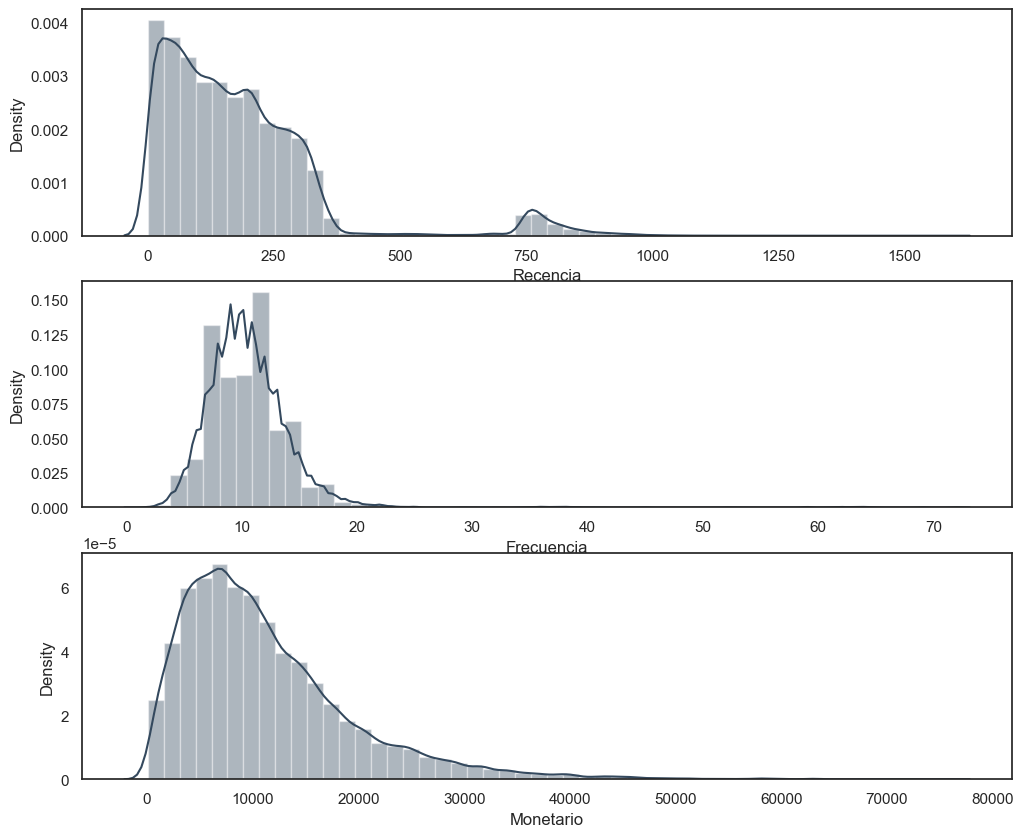

In [107]:
# Plot de las distribuciones de RFM
# ==============================================================================
plt.figure(figsize=(12,10))

# Distribucion de Recencia
# ==============================================================================
plt.subplot(3, 1, 1); sns.distplot(df_rfm['Recencia'])

# Distribucion de Frecuencia
# ==============================================================================
plt.subplot(3, 1, 2); sns.distplot(df_rfm['Frecuencia'])

# Distribucion del Valor Monetario
# ==============================================================================
plt.subplot(3, 1, 3); sns.distplot(df_rfm['Monetario'])

plt.show()

Podemos ver que se pueden clasificar como una distribución normal sesgada a la izquierda.

In [109]:
# Creamos un función para explorar las variables cuantitativas
# ==============================================================================
def explorarVariableNumerica(pDatos, pAtributo):
    plt.figure(figsize=(16,5))
    plt.subplot(131)
    plt.hist(pDatos[pAtributo], bins=25, alpha=0.75, facecolor='purple')
    plt.title('Histograma de: '+ pAtributo)
    plt.ylabel('Frecuencia')
    plt.xlabel(pAtributo)
    
    plt.subplot(132)
    plt.boxplot(pDatos[pAtributo])
    plt.title('Boxplot de: '+ pAtributo)
    plt.xlabel(pAtributo)
    plt.ylabel('Valor')
    plt.show()

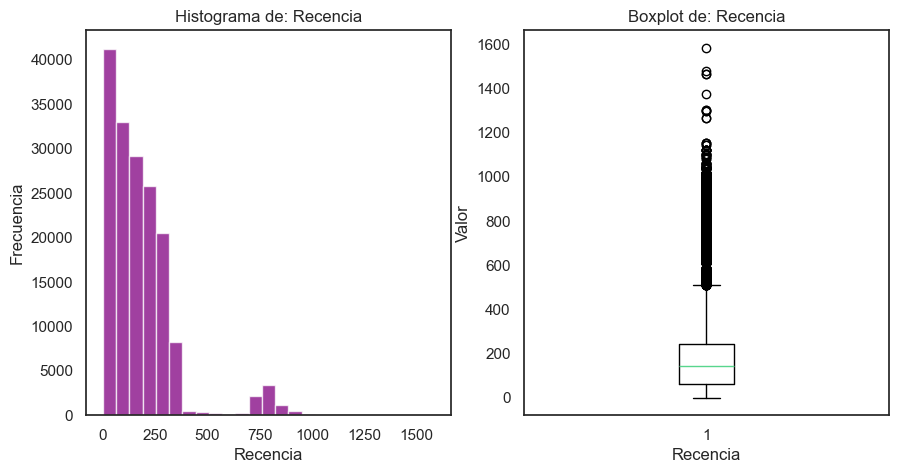

In [111]:
# Exploramos la Variable "Recencia":
# ==============================================================================
explorarVariableNumerica(df_rfm, 'Recencia')

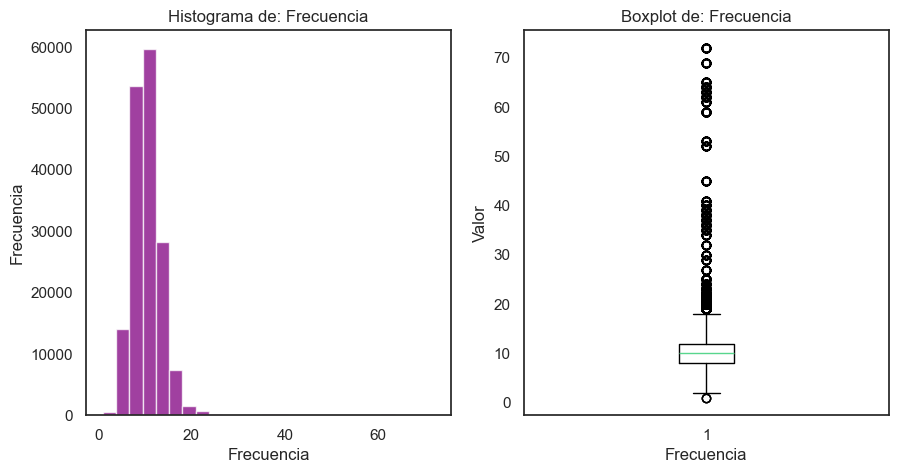

In [113]:
# Exploramos la Variable "Frecuencia":
# ==============================================================================
explorarVariableNumerica(df_rfm, 'Frecuencia')

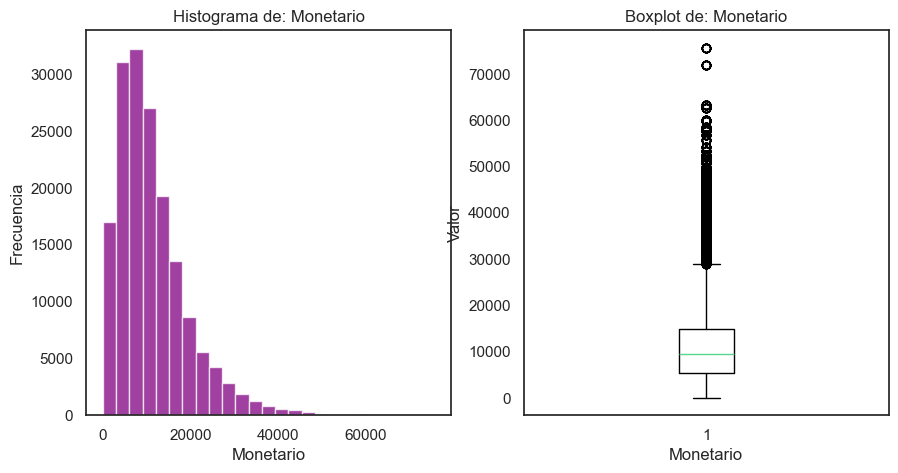

In [115]:
# Exploramos la Variable "Frecuencia":
# ==============================================================================
explorarVariableNumerica(df_rfm, 'Monetario')

In [117]:
df_rfm.describe()

,Clientes,Ultima_compra,Recencia,Frecuencia,Monetario
count,166922.000000,166922,166922.000000,166922.000000,166922.000000
mean,19870.329190,2022-01-01 01:31:40.609865216,179.936336,10.621254,11263.223428
min,11000.000000,2018-02-27 00:00:00,0.000000,1.000000,47.500000
25%,15132.000000,2021-10-31 00:00:00,64.000000,8.000000,5472.770000
50%,19726.000000,2022-02-05 00:00:00,145.000000,10.000000,9429.860000
75%,24503.000000,2022-04-27 00:00:00,242.000000,12.000000,14898.240000
max,29483.000000,2022-06-30 00:00:00,1584.000000,72.000000,75647.850000
std,5380.235311,NaN,170.114453,4.268227,8126.158246


<div class="alert alert-warning"> 
<strong><div style="color: rgb(0, 0, 0);">💭  Importante:</div></strong> <br>
    <div style="color: rgb(0, 0, 0);"> → Para facilitar nuestra creación de los cuartiles necesarios para realizar la segmentación, identificaremos las facturas que tuvieron un valor total igual a S/47.50 y clasificaremos que también tuvieron una Frecuencia igual a 1. </div>
</div>

In [119]:
# Dejando la frecuencia igual a 1 cuando el valor monetario es igual a 47.
# ==============================================================================
for i in df_rfm.index:
    if df_rfm['Monetario'][i] == 47:
        df_rfm['Frecuencia'][i] = 1

In [121]:
df_rfm.describe()

,Clientes,Ultima_compra,Recencia,Frecuencia,Monetario
count,166922.000000,166922,166922.000000,166922.000000,166922.000000
mean,19870.329190,2022-01-01 01:31:40.609865216,179.936336,10.621254,11263.223428
min,11000.000000,2018-02-27 00:00:00,0.000000,1.000000,47.500000
25%,15132.000000,2021-10-31 00:00:00,64.000000,8.000000,5472.770000
50%,19726.000000,2022-02-05 00:00:00,145.000000,10.000000,9429.860000
75%,24503.000000,2022-04-27 00:00:00,242.000000,12.000000,14898.240000
max,29483.000000,2022-06-30 00:00:00,1584.000000,72.000000,75647.850000
std,5380.235311,NaN,170.114453,4.268227,8126.158246


Ahora tenemos los cuartiles definidos:

| Categoria | Recencia | Frecuencia | V. Monetario |
| --- | --- | --- | --- |
| **Min** | 0 | 1 | S/47.50 |
| **25%** | 64 | 8| S/5,462.97 |
| **50%** | 145 | 10 | S/9,426.55 |
| **75%** | 241 | 12 | S/14,905.45 |
| **Max** | 1,584 | 72 | S/75,647.85 |

Con estos datos, crearemos el dataset.

In [123]:
# Creando los cuartiles de Recencia, Frecuencia y V. Monetario
# ==============================================================================
df_rfm['r_cuartil'] = pd.qcut(df_rfm['Recencia'], 4, ['1','2','3','4'])
df_rfm['f_cuartil'] = pd.qcut(df_rfm['Frecuencia'], 4, ['1','2','3','4'])
df_rfm['m_cuartil'] = pd.qcut(df_rfm['Monetario'], 4, ['1','2','3','4'])

# Creación de la columna "RFM" con la combinación de valores de Reciencia, Frecuencia y V. Monetario
df_rfm['RFM'] = df_rfm.r_cuartil.astype(str) + df_rfm.f_cuartil.astype(str) + df_rfm.m_cuartil.astype(str)
df_rfm.head()

,Clientes,Producto,Cliente,Distrito_Cliente,Tipo_Distrito,Ultima_compra,Recencia,Frecuencia,Monetario,r_cuartil,f_cuartil,m_cuartil,RFM
0,27207.0,"Road-150 Red, 62",Fernandez Zambrano Luis Angel,San Borja,Lima,2021-09-07,296,9,8541.6,4,2,2,422
1,27207.0,"Sport-100 Helmet, Blue",Fernandez Zambrano Luis Angel,San Borja,Lima,2021-09-07,296,9,8541.6,4,2,2,422
2,27207.0,"LL Road Frame - Black, 58",Fernandez Zambrano Luis Angel,San Borja,Lima,2021-09-07,296,9,8541.6,4,2,2,422
3,27207.0,"Classic Vest, M",Fernandez Zambrano Luis Angel,San Borja,Lima,2021-09-07,296,9,8541.6,4,2,2,422
4,27207.0,"Touring-2000 Blue, 46",Fernandez Zambrano Luis Angel,San Borja,Lima,2021-09-07,296,9,8541.6,4,2,2,422


<a id='categorizando-dataset'></a>
## <font color="#ba4a00"><strong> Categorizar cada segmento de clientes según el RFM generado </font>
<hr color="#F5F5F5" size="1">

De acuerdo con el **[artículo de Putler](https://www.putler.com/rfm-analysis/)**, podemos utilizar las siguientes 11 descripciones para cada categoría de cliente. En base a esto se incluye la columna "RFM" que contiene los valores que se usará para identificar cada tipo:

| Categoria | Descripción | RFM |
| --- |--- |--- |
| **Campeones** | Compró recientemente, compre con frecuencia y gaste más | 144 |
| **Clientes leales** | Gastan bien y con frecuencia. Son receptivos a las promociones. | 134, 143 y 133 |
| **Creyentes potenciales** | Clientes recientes, pero que gastaron mucho dinero y ya compraron más de una vez. | 123 y 124 |
| **Nuevos clientes** | Comprado recientemente pero no con frecuencia | 111, 112, 113 y 114 |
| **Promesas** | Compradores recientes que no gastaron mucho | 121, 122, 212 y 222 |
| **Clientes que necesitan atención** | Recencia, Frecuencia y Valor monetario por encima de la curva, pero es posible que no haya comprado eso recientemente | 244 y 344 |
| **Casi inactivo** | Recencia, Frecuencia y Valor monetario por debajo del promedio. Tiende a perderse si no se reactiva | 232, 322, 323 y 332 |
| **En riesgo** | Gastaron mucho dinero y compraron con frecuencia, pero durante mucho tiempo. Necesidad de volver a la base de clientes. | 333, 334, 343 y 433 |
| **No puedo perder** | Hizo compras grandes y frecuentes pero no regresó durante mucho tiempo | 243, 344, 434, 443 y 444 |
| **Hibernando** | La última compra fue hace mucho tiempo. Gastan poco y hacen pocos pedidos. | 311, 312, 321, 412, 421 y 422 |
| **Perdidos** | La Recencia, Frecuencia y Valor monetario más bajos entre todos | 411 |

In [148]:
# Creación de diccionario para facilitar la categorización en el Dataframe
# ==============================================================================
categorias_dict = {'144':'Campeones',
              '133':'Clientes Leales',
              '134':'Clientes Leales',
              '143':'Clientes Leales',
              '234':'Clientes Leales',
              '243':'Clientes Leales',
              '242':'Clientes Leales', # Nuevo
              '241':'Clientes Leales', # Nuevo
              '244':'Clientes Leales',
              '123':'Creyentes en Potencia',
              '213':'Creyentes en Potencia',
              '214':'Creyentes en Potencia',
              '223':'Creyentes en Potencia',
              '224':'Creyentes en Potencia',
              '233':'Creyentes en Potencia',
              '111':'Nuevos Clientes',
              '112':'Nuevos Clientes',
              '113':'Nuevos Clientes',
              '114':'Nuevos Clientes',
              '124':'Nuevos Clientes',
              '121':'Promesas',
              '211':'Promesas',
              '122':'Promesas',
              '212':'Promesas',
              '221':'Promesas',
              '222':'Promesas',
              '131':'Promesas',
              '132':'Promesas',
              '141':'Promesas',
              '142':'Promesas',
              '231':'Promesas',
              '334':'Clientes que necesitan Atención',
              '333':'Clientes que necesitan Atención',
              '344':'Clientes que necesitan Atención',
              '341':'Clientes que necesitan Atención', # Nuevo
              '423':'Clientes que necesitan Atención',
              '432':'Casi Inactivo',
              '232':'Casi Inactivo',
              '313':'Casi Inactivo',
              '314':'Casi Inactivo',
              '331':'Casi Inactivo',
              '332':'Casi Inactivo',
              '322':'Casi Inactivo',
              '323':'Casi Inactivo',
              '342':'Casi Inactivo',
              '343':'Casi Inactivo',
              '333':'En Riesgo',
              '334':'En Riesgo',
              '343':'En Riesgo',
              '433':'En Riesgo',
              '243':'No puedo Perder',
              '324':'No puedo Perder',
              '344':'No puedo Perder',
              '443':'No puedo Perder',
              '434':'No puedo Perder',
              '444':'No puedo Perder',
              '311':'Hibernando',
              '312':'Hibernando',
              '321':'Hibernando',
              '413':'Hibernando',
              '414':'Hibernando',
              '412':'Hibernando',
              '421':'Hibernando',
              '422':'Hibernando',
              '424':'Hibernando',
              '431':'Hibernando',
              '441':'Hibernando',
              '442':'Hibernando',
              '411':'Perdidos'
}

# Creando la columna "Categoría" que guardará la clasificación
df_rfm['Categoria'] = ''

# asignar la calificación al cliente
for i in df_rfm.index:
    if df_rfm['RFM'][i] in categorias_dict:
        item = df_rfm['RFM'][i]
        df_rfm['Categoria'][i] = categorias_dict[item]

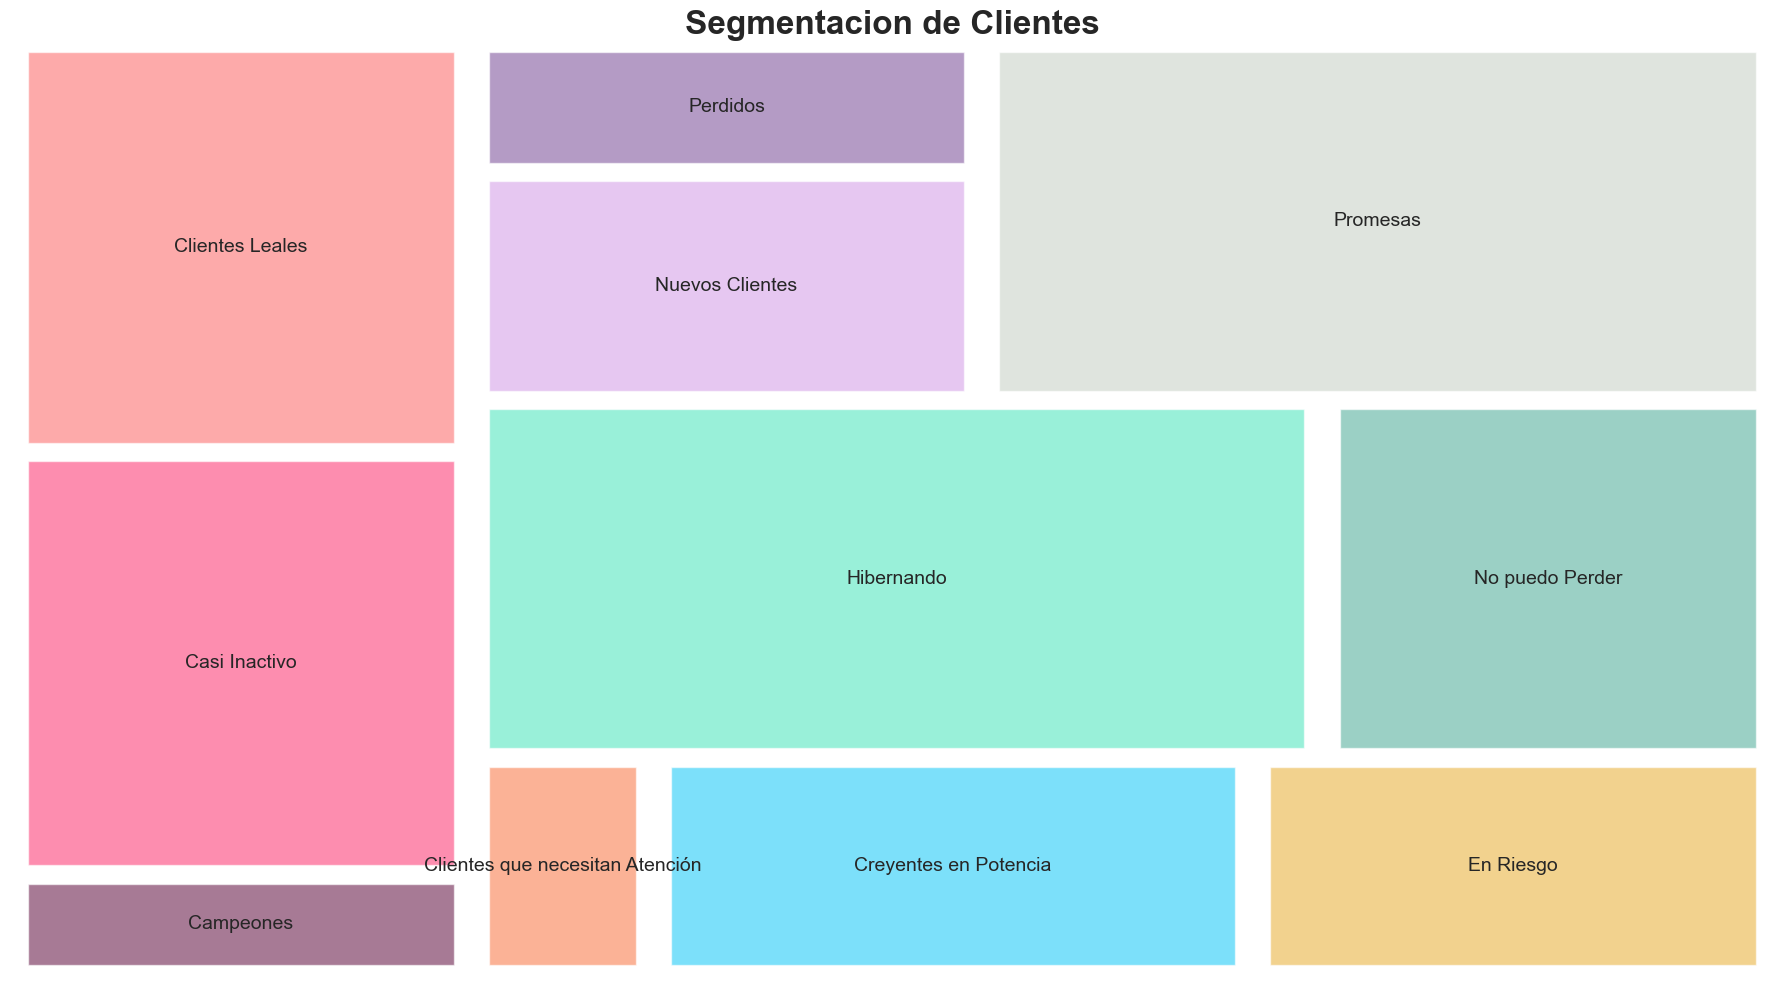

In [150]:
# Calculando el número de clientes en cada categoría
# ==============================================================================
df_categorias = df_rfm.groupby(['Categoria'], as_index=False)['RFM'].count()
df_categorias.rename(columns={'RFM':'Cantidades'}, inplace=True)

# definir una paleta de colores
colors = [
'#6D214F', # mangenta purple
'#FC427B', # sasquatch socks
'#FD7272', # georgia peach
'#F97F51', # rich gardenia
'#25CCF7', # spiro disco ball
'#EAB543', # honey glow
'#55E6C1', # sweet garden
'#58B19F', # keppel
'#D6A2E8', # bright ubbe
'#82589F', # highlighter lavender
'#CAD3C8', # falling star
'#BDC581', # pine glade
'#F8EFBA', #s arawak white pepper
]

# creando un gráfico de segmentación
fig, ax = plt.subplots(figsize=(18,10))
squarify.plot(sizes=df_categorias['Cantidades'],
              label=df_categorias['Categoria'],
              color=colors,
              pad=True,
              alpha=0.6,
              text_kwargs={'fontsize': 14})

# Agregando un título
plt.title('Segmentacion de Clientes',
          fontsize=24,
          fontweight="bold")

# Quitar los ejes
plt.axis('off')

# Ajustando el gráfico
plt.tight_layout()

plt.show()

#### **GUARDAR EL RESULTADO DEL ANALISIS RFM EN ARCHIVO XLSX:**

In [152]:
# Guardando los resultados del 'df_rfm'
# ==============================================================================
analisis_rfm = pd.DataFrame(df_rfm)
analisis_rfm.to_excel('Analisis_rfm.xlsx', index=False)

## **Segmentación de clientes por categorías:**

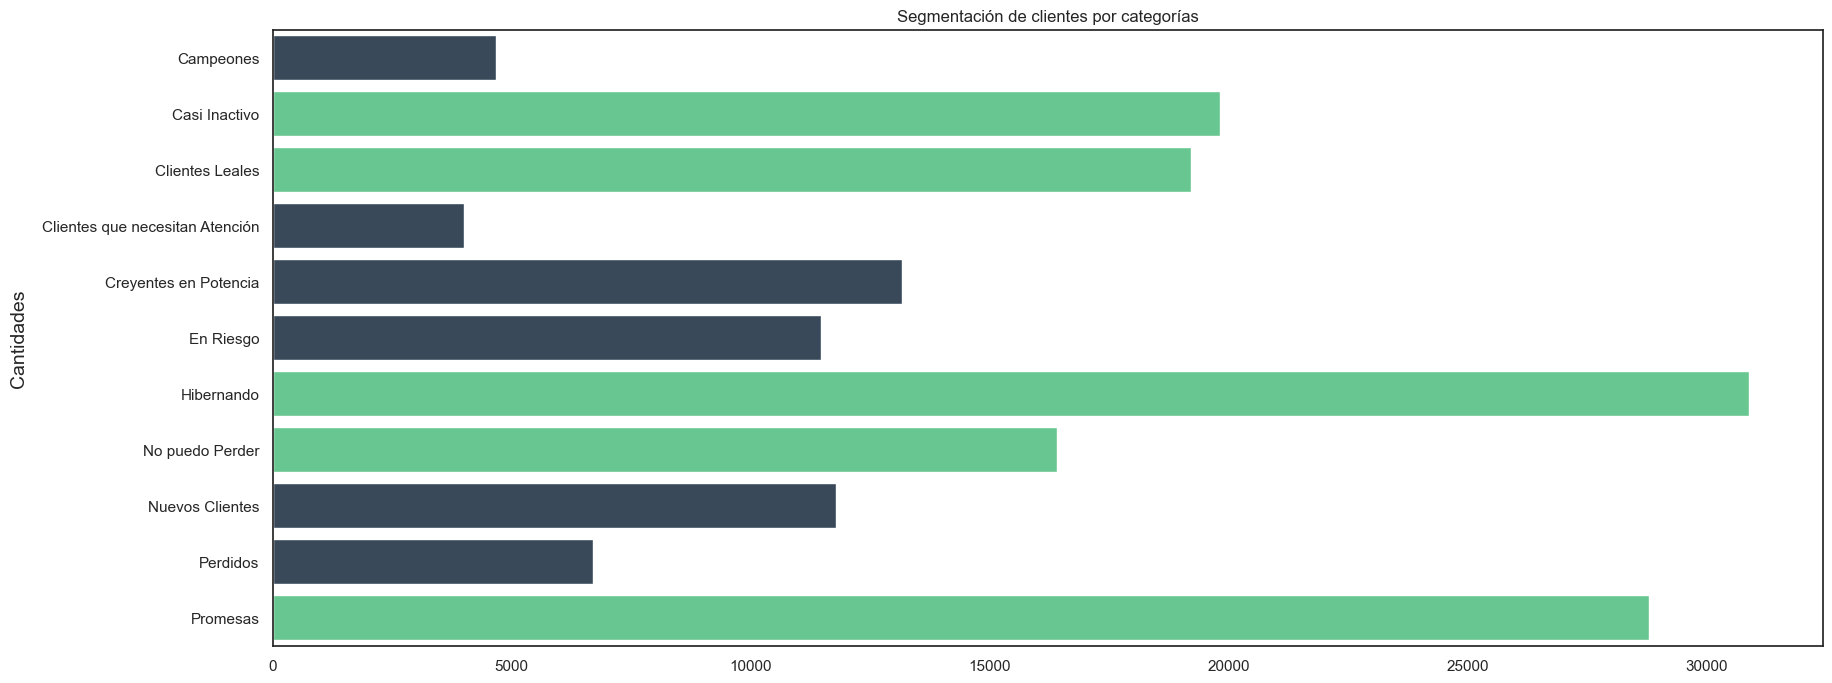

In [154]:
# Seleccionando los clientes por categorias
# ==============================================================================
minimo = min(df_categorias['Cantidades'].nlargest(n=5))

# colorear los 3 más grandes de azul y colorear el resto de gris
clrs = [gris if (x < minimo) else verde for x in df_categorias['Cantidades']]

# Creando el gráfico de barras
sns.set_theme(style="white", palette=None)
plt.figure(figsize = (20,8))
ax = sns.barplot(y="Categoria",
                 x="Cantidades",
                 data=df_categorias,
                 ci=False,
                 palette=clrs)

ax.set_title('Segmentación de clientes por categorías')
ax.set_xlabel('', fontsize=14, labelpad=10)
ax.set_ylabel('Cantidades', fontsize=14, labelpad=10)
plt.show()

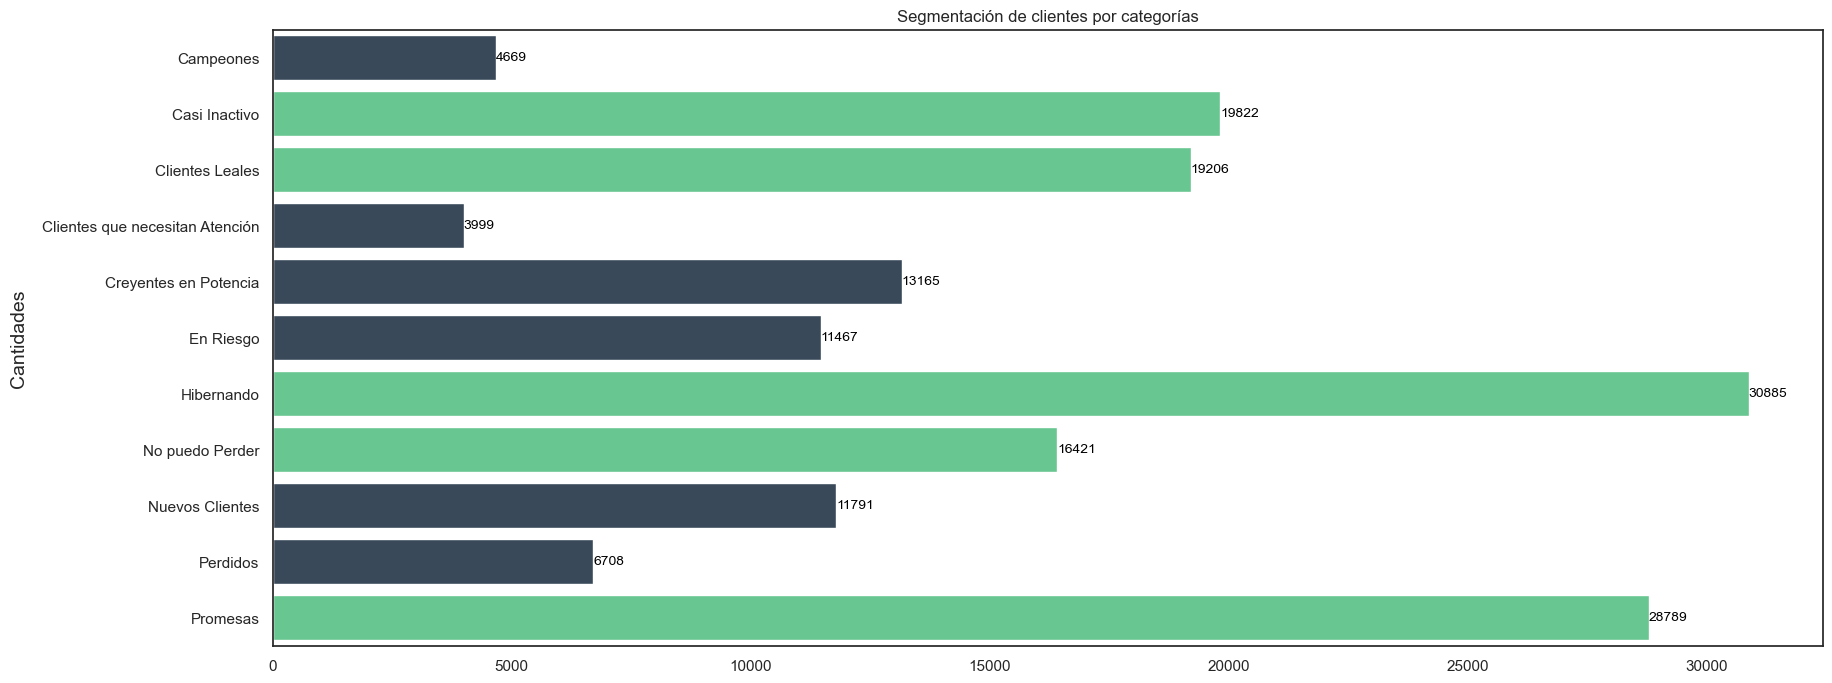

In [156]:
# Seleccionando los clientes por categorias
# ==============================================================================
minimo = min(df_categorias['Cantidades'].nlargest(n=5))

# colorear los 3 más grandes de azul y colorear el resto de gris
clrs = [gris if (x < minimo) else verde for x in df_categorias['Cantidades']]

# Creando el gráfico de barras
sns.set_theme(style="white", palette=None)
plt.figure(figsize = (20,8))
ax = sns.barplot(y="Categoria",
                 x="Cantidades",
                 data=df_categorias,
                 ci=False,
                 palette=clrs)

ax.set_title('Segmentación de clientes por categorías')
ax.set_xlabel('', fontsize=14, labelpad=10)
ax.set_ylabel('Cantidades', fontsize=14, labelpad=10)

# Agregar los marcadores de texto de cantidades
for p in ax.patches:
    width = p.get_width()    # obtener longitud de la barra
    ax.text(width + 1,       # establecer la posición del texto al final de la barra
            p.get_y() + p.get_height() / 2, # obtener coordenada Y + altura de la barra / 2
            '{:1.0f}'.format(width), # establecer variable para mostrar, 2 decimales
            ha = 'left',   # alineación horizontal
            va = 'center', # alineación vertical
            color='black',
            fontsize=10)  # color y tamaño de fuente

plt.show()

Los 5 segmentos más grandes por clientes son: **Casi Inanctivo**, **Clientes leales**, **Hibernando**, **No Puedo Perder** y **Promesas**.

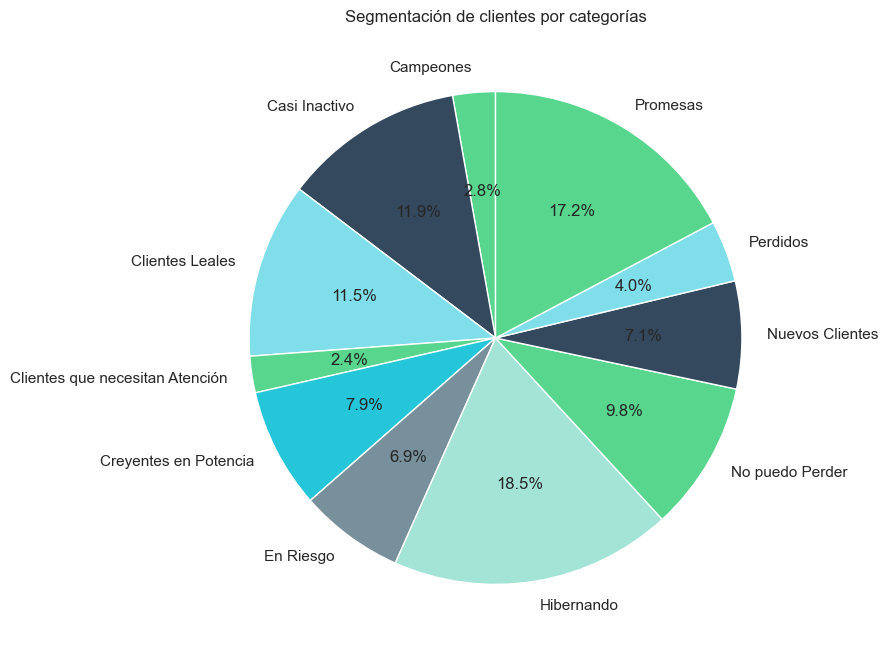

In [158]:
# Porcentaje de clientes por categorias
# ==============================================================================

# Calcular el total de clientes
total_clientes = df_categorias['Cantidades'].sum()

# Calcular el porcentaje de cada categoría
df_categorias['Porcentaje'] = (df_categorias['Cantidades'] / total_clientes) * 100

# Crear el gráfico de pastel
plt.figure(figsize=(8, 8))
plt.pie(df_categorias['Cantidades'], 
        labels=df_categorias['Categoria'], 
        autopct='%1.1f%%', 
        startangle=90,
        colors=[verde, gris, '#80deea', '#58d68d', '#26c6da', '#78909c', '#a3e4d7'])

# Agregar un título
plt.title('Segmentación de clientes por categorías')

# Mostrar el gráfico
plt.show()

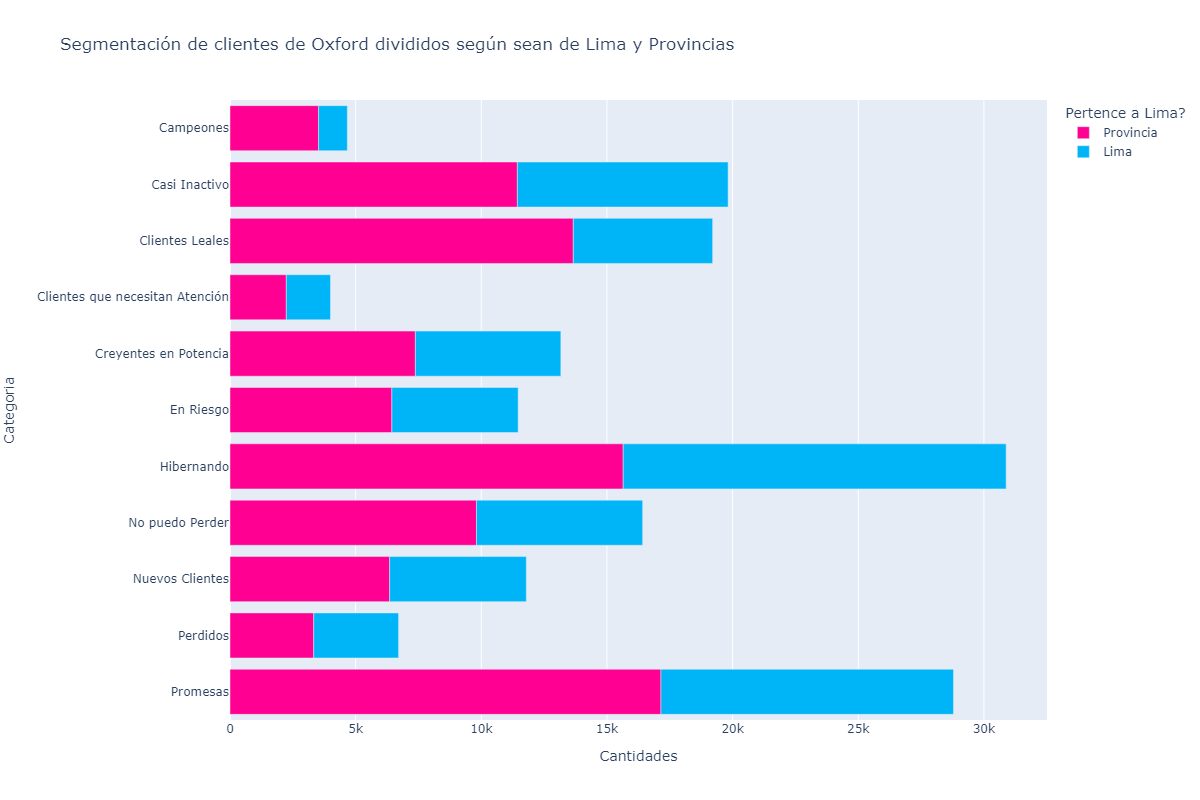

In [160]:
# Agrupando los clientes de Lima y Provincia de acuerdo a los Resultados
# ==============================================================================

clientes = df_rfm.groupby(['Categoria','Tipo_Distrito'], as_index=False)['Clientes'].count()
clientes.rename(columns={'Tipo_Distrito':'Pertence a Lima?','Clientes':'Cantidades'}, inplace=True)
clientes.sort_values(by='Categoria', ascending=False, inplace=True)

fig = px.bar(clientes,
             x="Cantidades",
             y="Categoria",
             color="Pertence a Lima?",
             title="Segmentación de clientes de Oxford divididos según sean de Lima y Provincias",
             orientation='h',
            color_discrete_sequence=[
                  px.colors.qualitative.Light24[16],
                  px.colors.qualitative.Light24[13]])

# Ajustar la altura del gráfico
fig.update_layout(height=800) # se puede cambiar 800 por el valor deseado

fig.show()

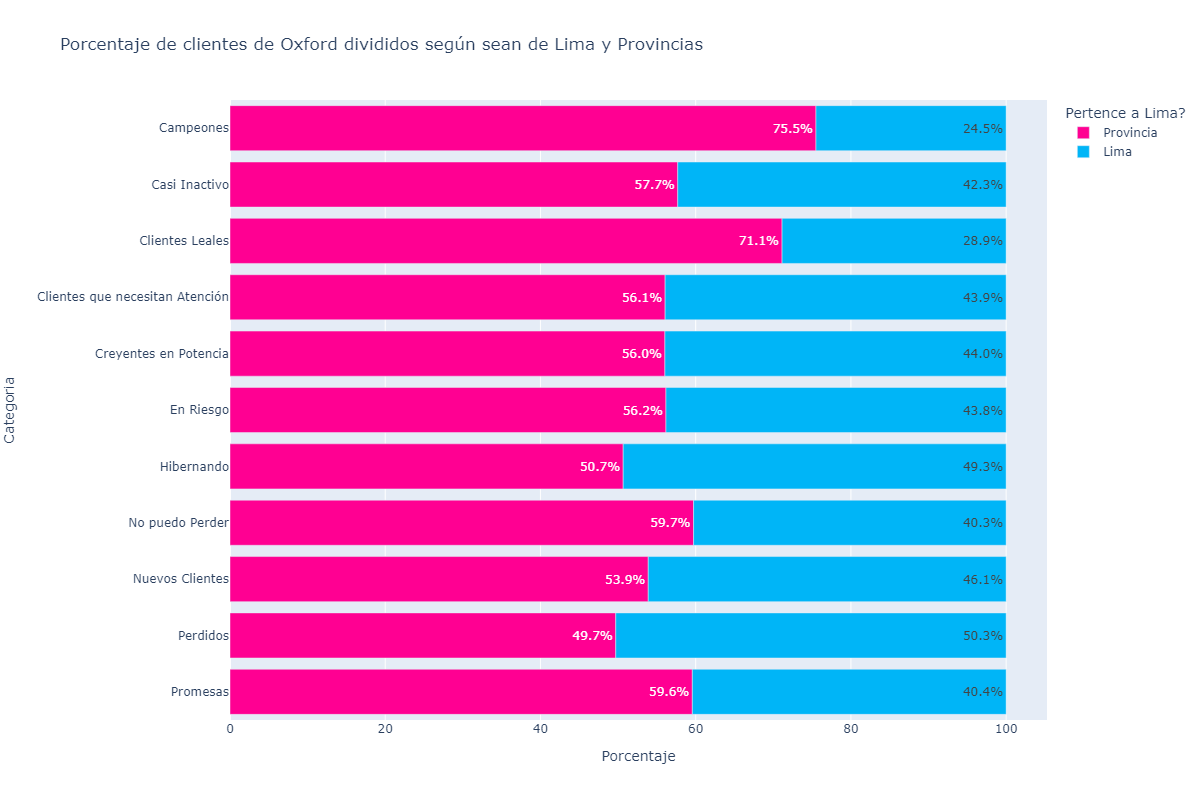

In [186]:
# Agrupando los clientes de Lima y Provincia de acuerdo a los Resultados
# ==============================================================================
clientes = df_rfm.groupby(['Categoria','Tipo_Distrito'], as_index=False)['Clientes'].count()
clientes.rename(columns={'Tipo_Distrito':'Pertence a Lima?','Clientes':'Cantidades'}, inplace=True)
clientes.sort_values(by='Categoria', ascending=False, inplace=True)

# Calcula el porcentaje de clientes para cada categoría
total_clientes = clientes.groupby('Categoria')['Cantidades'].sum().reset_index()
clientes = pd.merge(clientes, total_clientes, on='Categoria', suffixes=('', '_total'))
clientes['Porcentaje'] = (clientes['Cantidades'] / clientes['Cantidades_total']) * 100

fig = px.bar(clientes,
             x="Porcentaje",  # Cambia a 'Porcentaje'
             y="Categoria",
             color="Pertence a Lima?",
             title="Porcentaje de clientes de Oxford divididos según sean de Lima y Provincias", # Actualiza el título
             orientation='h',
            color_discrete_sequence=[
                  px.colors.qualitative.Light24[16],
                  px.colors.qualitative.Light24[13]],
             text=clientes['Porcentaje'].apply(lambda x: '{:.1f}%'.format(x)))  # Agrega marcadores de texto

# Ajustar la altura del gráfico
fig.update_layout(height=800) # se puede cambiar 800 por el valor deseado
fig.update_traces(textposition='inside')  # coloca el texto dentro de las barras
fig.show()

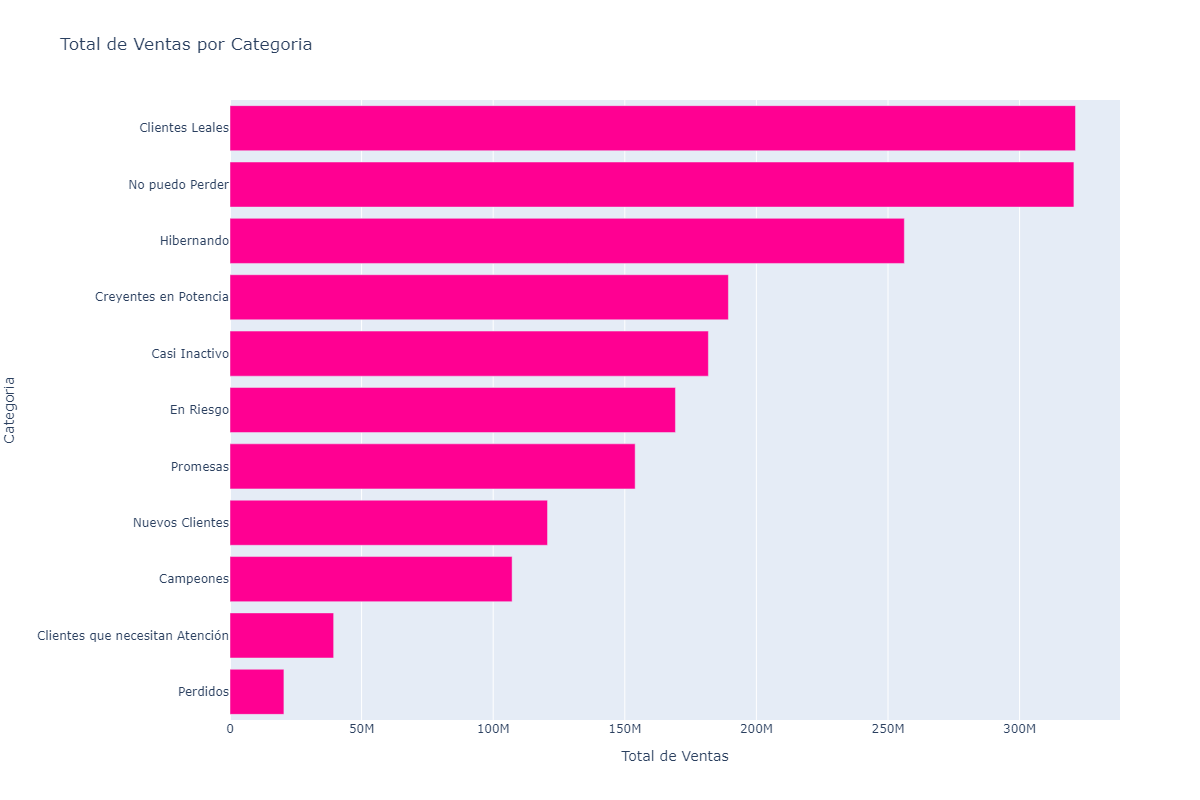

In [162]:
# Calculando la segmentación de acuerdo a las ventas obtenidas
# ==============================================================================

importe = df_rfm.groupby(['Categoria'],as_index=False)['Monetario'].sum()
importe.rename(columns={'Monetario':'Total de Ventas'}, inplace=True)
importe.sort_values(by='Total de Ventas', ascending=True, inplace=True)

fig = px.bar(importe,
             x="Total de Ventas",
             y="Categoria",
             title="Total de Ventas por Categoria",
             orientation='h',
            color_discrete_sequence=[
                  px.colors.qualitative.Light24[16]])

# Ajustar la altura del gráfico
fig.update_layout(height=800) # se puede cambiar 800 por el valor deseado

fig.show()

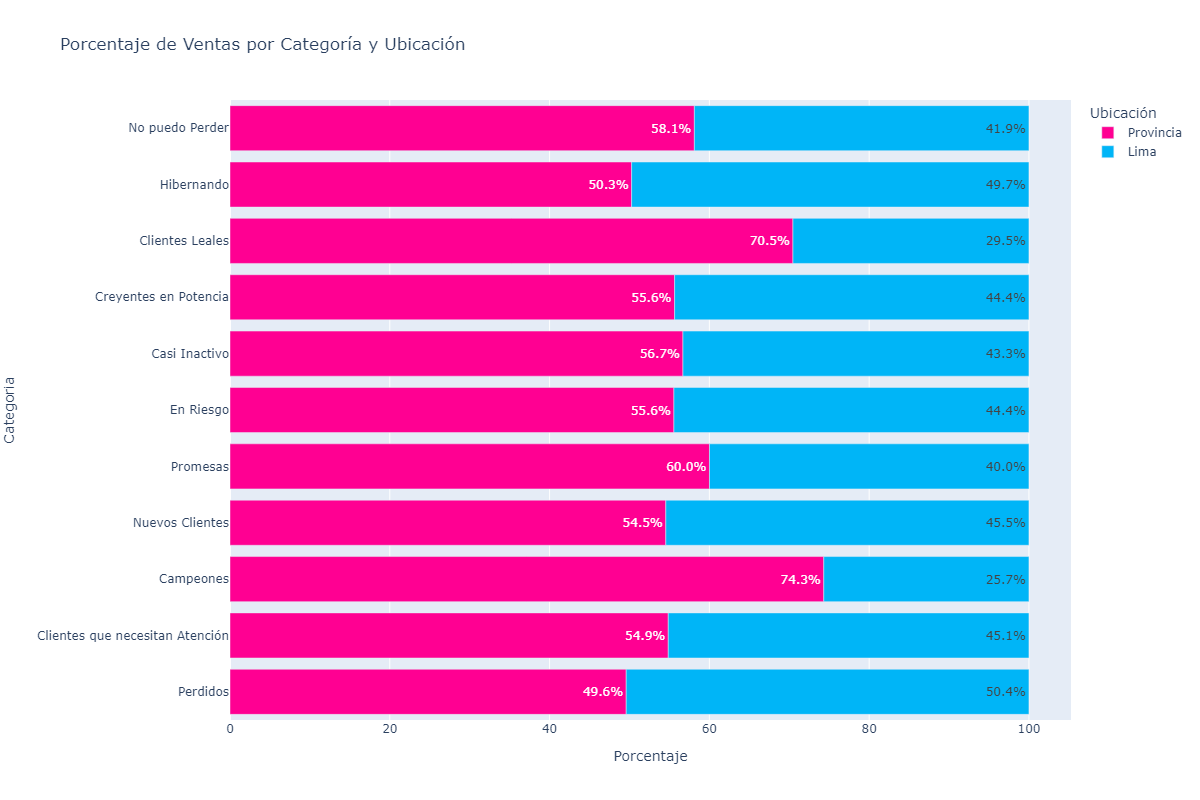

In [189]:
# Calculando la segmentación de acuerdo a las ventas obtenidas
# ==============================================================================

# Agrega 'Tipo_Distrito' al groupby para separar por Lima/Provincia
importe = df_rfm.groupby(['Categoria', 'Tipo_Distrito'], as_index=False)['Monetario'].sum()
importe.rename(columns={'Monetario':'Total de Ventas', 'Tipo_Distrito': 'Ubicación'}, inplace=True)
importe.sort_values(by='Total de Ventas', ascending=True, inplace=True)

# Calcula el porcentaje de ventas para cada categoría y ubicación
total_ventas = importe.groupby('Categoria')['Total de Ventas'].sum().reset_index()
importe = pd.merge(importe, total_ventas, on='Categoria', suffixes=('', '_total'))
importe['Porcentaje'] = (importe['Total de Ventas'] / importe['Total de Ventas_total']) * 100

fig = px.bar(importe,
             x="Porcentaje",  # Cambia a 'Porcentaje'
             y="Categoria",
             color="Ubicación",  # Cambia a 'Ubicación'
             title="Porcentaje de Ventas por Categoría y Ubicación",  # Actualiza el título
             orientation='h',
             color_discrete_sequence=[
                  px.colors.qualitative.Light24[16],
                  px.colors.qualitative.Light24[13]],
             text=importe['Porcentaje'].apply(lambda x: '{:.1f}%'.format(x)))  # Agrega marcadores de texto

# Ajustar la altura del gráfico
fig.update_layout(height=800) # se puede cambiar 800 por el valor deseado
fig.update_traces(textposition='inside')  # coloca el texto dentro de las barras
fig.show()

Los 3 segmentos mas grandes por ventas son: **Clientes Leales**, **No Puedo perder** y **Hibernando**

In [164]:
# Calculando las Ventas totales
# ==============================================================================

print('Total de Ventas: ', importe['Total de Ventas'].sum())

Total de Ventas:  1880079781.0099998


In [166]:
# Ventas de la primera categoria
# ==============================================================================
clientes_leales = importe['Total de Ventas'][2] # es la ubicacion de acuerdo al primer grafico (contando desde cero)
print("Los ingresos de la categoría Clientes Leales: ",clientes_leales)
print("Ingresos de otras categorías: ",importe['Total de Ventas'].sum()-clientes_leales)
print("Percentual: ",clientes_leales/importe['Total de Ventas'].sum())

Los ingresos de la categoría Clientes Leales:  321239073.25
Ingresos de otras categorías:  1558840707.7599998
Percentual:  0.1708645965425078


In [168]:
# Ventas de la segunda categoria
# ==============================================================================
clientes_no_puedo_perder = importe['Total de Ventas'][7]
print("Ingresos de la categoría Clientes No Puedo Perder: ",clientes_no_puedo_perder)
print("Percentual: ",clientes_no_puedo_perder/(importe['Total de Ventas'].sum()))

Ingresos de la categoría Clientes No Puedo Perder:  320638297.33
Percentual:  0.1705450484435025


<a id='recomendaciones'></a>
# <font color="#ba4a00"><strong> Recomendaciones a Oxford-Perú </font>
<hr color="#F5F5F5" size="1">

* Teniendo en cuenta el principio de Pareto que dice que debemos centrar nuestros esfuerzos en <font color="#ff009e"><strong>20% de actividades que generan 80% de retorno</strong></font>, Por lo tanto, debemos evaluar qué segmentos de clientes generan el mayor retorno para Oxford - Perú.
* La categoria **"Clientes Leales" ha generado S/321,239,073.25** esto representa el **17.09% de ingresos totales** que es de S/1,880,079,781.01 
* Con casi **19,206 clientes** están clasificados como "Clientes Leales", representando alrededor **11.5% del número total de clientes**.
* La segunda categoría más grande en ingresos es **Clientes No Puedo Perder** que **ha generado S/320,638,297.33**, con un **17.05% de facturación**. Con **16,421 clientes** que representan el **9.8%** del total de clientes.

<div class="alert alert-success"> 
<strong><div style="color: rgb(0, 0, 0);">💡 Análisis</div></strong> <br>
     <div style="color: rgb(0, 0, 0);">  → Podemos concluir que <strong> los principales esfuerzos deben concentrarse</strong> en clientes clasificados como <strong>Clientes Leales</strong>, porque solo el<mark><strong> 17.09% de los clientes</strong></mark> fue responsable de <strong><mark>generar casi el 20% de los ingresos totales</mark></strong>.</div>         
     <div style="color: rgb(0, 0, 0);">  → Es necesario evaluar bien los esfuerzos realizados en la segunda categoría de <strong>Clientes No Puedo Perder</strong>, ya que sus ingresos son casi similares en comparación con los ingresos de la categoría "Clientes Leales".</div>
    <div style="color: rgb(0, 0, 0);">  → También podemos reforzar que el análisis de <strong>retención de clientes por cohorte</strong> funciona mejor para los clientes que <strong>viven en Lima y darles prioridadd debido a su ubicación con la tienda principal.</strong>.</div>
</div>

## <font color="#ba4a00"><strong> Recomendaciones adicionales para cada categoría de cliente </font>
<hr color="#F5F5F5" size="1">

Las recomendaciones de acciones indicadas por el artículo de [Putler](https://www.putler.com/rfm-analysis/) a adoptar para cada categoría de clientes se puede resumir principalmente en:

| Categoria | Recomendaciones | 
|--- |--- |
| **Campeones** | Recompensarlos. Los campeones pueden ser _primeros usuarios_ de nuevos productos y promocionará la marca. |
| **Clientes Leales** | Ofrecer productos de mayor valor. Solicitando reseñas de productos y haciendo todo lo posible para atraerlas. | 
| **Creyentes Potenciales** | Ofrecer programas de membresía o fidelización y recomendar otros productos. |
| **Nuevos Clientes** | Brindarles todo el apoyo que necesitan durante la incorporación, para que puedan alcanzar el éxito más rápidamente. Empezando a construir una relación. |
| **Promesas** | Crear _conciencia_ para la marca y ofrecer pruebas o pruebas gratuitas. |
| **Clientes que necesitan Atención** | Ofrecer ofertas por tiempo limitado, recomendadas en base a compras anteriores. Para que puedan reactivarse. |
| **Casi Inactivos** | Compartir recursos valiosos, recomendando renovaciones o productos populares con descuento y volver a conectarse con ellos. |
| **En Riesgo** | Enviar correos electrónicos personalizados para volver a conectarse con ellos. Ofrecer renovaciones y proporcionar recursos útiles. |
| **No puedo Perder** | Recuperarlos mediante renovaciones o nuevos productos. Hablar con ellos para evitar reforzar la competencia. |
| **Hibernando** | Ofrecer otros productos relevantes y descuentos especiales. De este modo, es posible recrear el valor de la marca para dichos clientes. |
| **Perdidos** | Intentar reavivar su interés con campañas. Si no funciona, ignorarlos. |

<a id='referencias'></a>
# <font color="#ba4a00"><strong> Referencias Bibliograficas para el desarrollo de este proyecto. </font>
<hr color="#F5F5F5" size="1">

- [Cómo hacer un análisis de cohorte y por qué es importante para los PMs](https://www.cursospm3.com.br/blog/como-fazer-analise-cohort-e-por-que-ela-e-importante-para-pms/)

- [Cómo: Análisis de cohortes con Google Colab, Pandas y Seaborn en 5 pasos](https://dataholds.com/como-fazer-analise-cohort-com-google-colab-pandas-e-seaborn-em-5-passos/)

- [Análisis RFM para una segmentación exitosa de clientes](https://www.putler.com/rfm-analysis/)

- [Análisis RFM para la segmentación de clientes](https://vidadeproduto.com.br/analise-rfm/)

- [Introducción a la segmentación de clientes en Python](https://www.datacamp.com/tutorial/introduction-customer-segmentation-python)